# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Работа-с-пропусками" data-toc-modified-id="Работа-с-пропусками-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Работа с пропусками</a></span></li><li><span><a href="#Изменение-типов-данных" data-toc-modified-id="Изменение-типов-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Изменение типов данных</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Исследование-отдельных-параметров" data-toc-modified-id="Исследование-отдельных-параметров-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Исследование отдельных параметров</a></span></li><li><span><a href="#Редкие-и-выбивающиеся-значения" data-toc-modified-id="Редкие-и-выбивающиеся-значения-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Редкие и выбивающиеся значения</a></span></li><li><span><a href="#Факторы,-влияющие-на-цену-квартиры." data-toc-modified-id="Факторы,-влияющие-на-цену-квартиры.-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Факторы, влияющие на цену квартиры.</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span>

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pymystem3 import Mystem 
m = Mystem()
from collections import Counter

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t') # чтение исходных данных, символ для разделения колонок \t
df.info() # вызываем общую информацию о базе данных объявлений о продаже квартир
display(df.head(10)) # выводим на экран первые строки датафрейма для знакомства

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Вывод

База данных содержит сведения из 23699 объявлений о продаже квартир в Санкт-Петербурге и пригородах за несколько лет. В таблице 22 колонки, названия колонок корректные, соответствуют описанию. Типы данных различные, в зависимости от содержания колонки. Обратили внимание на некоторые особенности представленных сведений: *Размерность числовых данных в некоторых случаях целесообразно сделать более "читаемой", цену перевести в тысячи рублей, расстояния в километры; * дата подачи заявления записана как object, что помешает изучению влияния на продажи даты размещения объявления, дня недели, месяца, года, необходимо преобразовать в datetime; * в 14 колонках имеются пропуски, которые необходимо обработать исходя из количества пропусков, значимости параметра для анализа, возможных причин появления пропусков.

Описание данных:
 - airports_nearest — расстояние до ближайшего аэропорта в метрах (м) 
 - balcony — число балконов 
 - ceiling_height — высота потолков (м) 
 - cityCenters_nearest — расстояние до центра города (м) 
 - days_exposition — сколько дней было размещено объявление (от публикации до снятия) 
 - first_day_exposition — дата публикации 
 - floor — этаж 
 - floors_total — всего этажей в доме 
 - is_apartment — апартаменты (булев тип) 
 - kitchen_area — площадь кухни в квадратных метрах (м²) 
 - last_price — цена на момент снятия с публикации 
 - living_area — жилая площадь в квадратных метрах (м²) 
 - locality_name — название населённого пункта 
 - open_plan — свободная планировка (булев тип) 
 - parks_around3000 — число парков в радиусе 3 км 
 - parks_nearest — расстояние до ближайшего парка (м) 
 - ponds_around3000 — число водоёмов в радиусе 3 км 
 - ponds_nearest — расстояние до ближайшего водоёма (м) 
 - rooms — число комнат 
 - studio — квартира-студия (булев тип) 
 - total_area — площадь квартиры в квадратных метрах (м²) 
 - total_images — число фотографий квартиры в объявлении

## Предобработка данных

### Работа с пропусками

In [3]:
df.isna().mean() # определили долю пропущенных значений в столбцах

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

Доля пропусков меняется от 0.2% до 88.3%. 
     Доля пропусков менее одного процента  обнаружена в сведениях о количестве этажей в доме (`floors_total` 0.003629) и названии населенного пункта (`locality_name` 0.002068). Эти пропуски носят полностью случайный характер, их количество ничтожно, строки с пропущенными значениями в этих столбцах удалили.

In [4]:
df = df.dropna(subset = ['floors_total', 'locality_name']) # удалили строки с отсутствующими значениями в выбранных столбцах
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        14481 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21700 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          2760 non-null   object 
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               12090 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

Удалили 134 строки, что составляет менее 1% (0.56) от количества объявлений.

**Высота потолка** `ceiling_height` не указана в 38% объявлений. Этот параметр влияет на цену квартиры, так как в помещениях с низким потолком меньше воздуха. Чтобы максимально достоверно заполнить пропуски в данных о высоте потолка изучили распределение значений внутри столбца и зависимость высоты потолка от других параметров.

In [5]:
df['ceiling_height'].describe() # ознакомились с описанием данныых о высоте потолка.

count    14481.000000
mean         2.771283
std          1.261983
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Данные о высоте поптолка не только содержат много пропущенных значений, но и содержат недостоверные значения, о чём свидетельствует min = 1 метру и max = 14 метрам.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        14481 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21700 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          2760 non-null   object 
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               12090 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

In [7]:
display(df.sort_values('ceiling_height').head(10)) # отсортировали высоту потолка по возрастанию, 
#посмотрели наименьшие значения

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22590,16,6000000.0,55.00,2018-10-31T00:00:00,2,1.00,12.0,32.4,7,NaN,...,10.00,NaN,Санкт-Петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,13.0
5712,5,1500000.0,42.80,2017-08-14T00:00:00,2,1.20,2.0,27.5,1,NaN,...,5.20,NaN,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0
16934,5,4100000.0,40.00,2017-10-17T00:00:00,1,1.75,37.0,17.4,5,NaN,...,8.34,NaN,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0
5850,9,1650000.0,35.50,2018-05-29T00:00:00,1,2.00,5.0,NaN,5,NaN,...,NaN,NaN,Луга,NaN,NaN,NaN,NaN,NaN,NaN,100.0
19098,7,2700000.0,56.00,2018-02-04T00:00:00,3,2.00,5.0,46.0,1,NaN,...,6.00,NaN,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,282.0
552,11,2999000.0,33.50,2017-03-30T00:00:00,1,2.00,15.0,17.5,6,NaN,...,6.50,NaN,Санкт-Петербург,33972.0,11746.0,1.0,520.0,1.0,949.0,270.0
16884,0,1500000.0,33.00,2018-10-03T00:00:00,1,2.00,5.0,20.0,5,False,...,6.00,NaN,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,6.0
4212,1,2120000.0,35.43,2017-12-18T00:00:00,1,2.00,18.0,16.6,9,NaN,...,8.80,2.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,36.0
22960,17,2300000.0,53.60,2018-10-18T00:00:00,2,2.00,2.0,19.0,1,NaN,...,10.00,NaN,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20520,9,3600000.0,38.00,2018-07-05T00:00:00,1,2.00,12.0,15.0,9,NaN,...,11.80,1.0,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,62.0


Обнаружили три объявления с потолками меньше 2 метров. Явно недостоверные сведения, такие объявления удалили. Назначили новую переменную, включающую объявления с заполненным значением высоты потолка, чтобы исследовать распределение значений высоты потолка и взаимосвязь метрики с этажностью дома. Этажность косвенно может свидетельствовать о годе пострйки и серии проекта, каковые отсутствуют в нашем распоряжении.  

In [8]:
df_ceiling = df.query('ceiling_height >= 2.0')
df_ceiling['ceiling_height'].describe()

count    14478.000000
mean         2.771584
std          1.261932
min          2.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [9]:
df_ceiling.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14478 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          14478 non-null  int64  
 1   last_price            14478 non-null  float64
 2   total_area            14478 non-null  float64
 3   first_day_exposition  14478 non-null  object 
 4   rooms                 14478 non-null  int64  
 5   ceiling_height        14478 non-null  float64
 6   floors_total          14478 non-null  float64
 7   living_area           13684 non-null  float64
 8   floor                 14478 non-null  int64  
 9   is_apartment          1856 non-null   object 
 10  studio                14478 non-null  bool   
 11  open_plan             14478 non-null  bool   
 12  kitchen_area          13543 non-null  float64
 13  balcony               7241 non-null   float64
 14  locality_name         14478 non-null  object 
 15  airports_nearest   

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        14481 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21700 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          2760 non-null   object 
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               12090 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

In [11]:
display(df_ceiling.sort_values('ceiling_height', ascending=False).head(20)) # посмотрели самые высокие потолки

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22869,0,15000000.0,25.0,2018-07-25T00:00:00,1,100.0,5.0,14.0,5,True,...,11.0,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0
3148,14,2900000.0,75.0,2018-11-12T00:00:00,3,32.0,3.0,53.0,2,NaN,...,8.0,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22336,19,9999000.0,92.4,2019-04-05T00:00:00,2,32.0,6.0,55.5,5,False,...,16.5,4.0,Санкт-Петербург,18838.0,3506.0,0.0,NaN,3.0,511.0,NaN
21377,19,4900000.0,42.0,2017-04-18T00:00:00,1,27.5,24.0,37.7,19,False,...,11.0,2.0,Санкт-Петербург,42742.0,9760.0,0.0,NaN,0.0,NaN,61.0
22938,14,4000000.0,98.0,2018-03-15T00:00:00,4,27.0,2.0,73.0,2,True,...,9.0,1.0,деревня Нижняя,NaN,NaN,NaN,NaN,NaN,NaN,27.0
10773,8,3800000.0,58.0,2017-10-13T00:00:00,2,27.0,10.0,30.1,3,False,...,8.1,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,71.0
17857,1,3900000.0,56.0,2017-12-22T00:00:00,3,27.0,5.0,33.0,4,False,...,NaN,NaN,Санкт-Петербург,41030.0,15543.0,0.0,NaN,0.0,NaN,73.0
5807,17,8150000.0,80.0,2019-01-09T00:00:00,2,27.0,36.0,41.0,13,NaN,...,12.0,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
5246,0,2500000.0,54.0,2017-10-13T00:00:00,2,27.0,5.0,30.0,3,NaN,...,9.0,2.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0
20478,11,8000000.0,45.0,2017-07-18T00:00:00,1,27.0,4.0,22.0,2,NaN,...,10.0,1.0,Санкт-Петербург,18975.0,3246.0,0.0,NaN,3.0,449.0,429.0


Объявление о продаже  однокомнатных апартаментов площадью 25 метров с потолком 100 метров с балконами в количестве 5 штук явно мусорное и удалено.     

In [12]:
df_ceiling = df_ceiling.query('ceiling_height != 100.0')
df_ceiling['ceiling_height'].describe()

count    14477.000000
mean         2.764868
std          0.969278
min          2.000000
25%          2.520000
50%          2.650000
75%          2.800000
max         32.000000
Name: ceiling_height, dtype: float64

Высота потолка  32, 27, 25  метров это ошибки, вероятнее всего, допущенные при внесении сведений, не поставили точки, отделяющие дробную часть,  высота потолка очевидно 3.2, 2.7 и так далее. Исравить эти опечатки необходимо до построения гистограммы, так как аномально большие значения исказят распределение. 

In [13]:
def ceiling_height(ceiling_height): # функция для исправления опечаток в высоте потолка
    if ceiling_height >= 20: # если значение больше 20 метров
        return ceiling_height/10 # разделить на 10
    else:
        return ceiling_height # иниче не менять
print(ceiling_height(20))  # проверили работу функции  

2.0


In [14]:
df_ceiling['ceiling_height'] = df_ceiling['ceiling_height'].apply(ceiling_height) # применили функцию  
display(df_ceiling.sort_values('ceiling_height', ascending=False).head(20)) # посмотрели результат применения функции

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
15061,19,5600000.0,56.4,2018-05-11T00:00:00,2,14.00,14.0,32.4,5,NaN,...,9.1,2.0,Санкт-Петербург,14814.0,13610.0,0.0,NaN,0.0,NaN,315.0
22309,20,5300000.0,45.0,2017-09-30T00:00:00,1,10.30,16.0,15.5,15,NaN,...,NaN,NaN,Санкт-Петербург,36353.0,11936.0,2.0,440.0,2.0,450.0,136.0
5863,20,5650000.0,45.0,2018-08-15T00:00:00,1,8.30,16.0,19.3,14,NaN,...,8.3,1.0,Санкт-Петербург,13069.0,10763.0,0.0,NaN,1.0,613.0,14.0
17442,0,5350000.0,54.0,2015-06-16T00:00:00,2,8.00,5.0,29.0,2,NaN,...,NaN,1.0,Красное Село,24638.0,28062.0,0.0,NaN,0.0,NaN,469.0
15743,14,5600000.0,67.0,2016-11-11T00:00:00,3,8.00,16.0,41.0,1,NaN,...,8.0,NaN,Санкт-Петербург,32691.0,11035.0,1.0,723.0,0.0,NaN,474.0
3474,3,1400000.0,30.0,2018-03-16T00:00:00,1,8.00,5.0,15.3,2,False,...,7.3,NaN,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0
20264,17,119000000.0,187.6,2017-07-10T00:00:00,4,6.00,7.0,147.0,7,NaN,...,15.6,NaN,Санкт-Петербург,26902.0,5605.0,3.0,484.0,1.0,305.0,259.0
21227,0,8200000.0,71.0,2017-07-21T00:00:00,0,5.80,5.0,68.0,5,NaN,...,NaN,0.0,Санкт-Петербург,20170.0,1261.0,2.0,295.0,3.0,366.0,30.0
1388,20,59800000.0,399.0,2015-01-21T00:00:00,5,5.60,6.0,NaN,6,NaN,...,NaN,0.0,Санкт-Петербург,26204.0,6934.0,2.0,149.0,2.0,577.0,719.0
7578,17,38000000.0,143.0,2017-11-02T00:00:00,3,5.50,5.0,83.0,5,NaN,...,29.0,1.0,Санкт-Петербург,26333.0,6448.0,3.0,479.0,0.0,NaN,NaN


    Высота потолка от 5 до 6 метров включительно указана для очень больших квартир на верхних этажах, что вполне объяснимо, это могут быть пэнхаусы. 
    Высота потолка 8 и более метров в маленьких квартирах - это явные ошибки, таких в базе данных шесть объявлений, их исключили.
    Построили гистограмму распределения значений высоты потолка, используя диапазон реальных значений     

In [15]:
df_ceiling = df_ceiling.query('ceiling_height <= 6.0')
df_ceiling['ceiling_height'].describe()

count    14471.000000
mean         2.726336
std          0.278547
min          2.000000
25%          2.510000
50%          2.650000
75%          2.800000
max          6.000000
Name: ceiling_height, dtype: float64

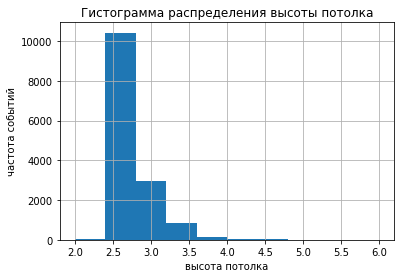

In [16]:
df_ceiling['ceiling_height'].hist(bins=10, range=(2, 6)) 
plt.title('Гистограмма распределения высоты потолка')
plt.xlabel('высота потолка')
plt.ylabel('частота событий')
plt.show();

Очевидно, что чаще всего высота потолка составляет от 2.5 до 2.75 метров. На втором месте количество квартир с высотой потолка в диапазоне от 2.8 до 3.2 . Имеется ничтожное количество квартир с потолками от 2 до 2.4 метра, это могут быть бывшие комнаты для прислуги в старинных домах (подъезд с черного хода). *Более 3.2 метров - потолок в старинных домах или дорогих новостройках. Предположили, что высота потолка может быть связана с этажностью дома, для проверки предположения исследовали распределение медианного значения и количества попаданий высоты потолка для домов разной этажности. Для этого создали сводную таблицу, в которой строки это количество этажей в доме, столбцы - медианное значение высоты потолка для домов с таким количеством этажей и количество объявлений, по которым посчитана медиана.

In [17]:
df_ceiling.pivot_table(index = 'floors_total', values = 'ceiling_height', aggfunc = ['median', 'count']) # сводная таблица 

,median,count
,ceiling_height,ceiling_height
floors_total,,
1.0,2.80,10
2.0,2.70,212
3.0,2.80,399
4.0,3.00,787
5.0,2.55,3659
6.0,3.00,618
7.0,3.00,397
8.0,2.80,219


Относительно массовой советсткой застройки наши предположения оказались верными: больше всего значений приходится на типовые дома 5 этажей и 9 этажей, в них медианная высота потолка 2.55 метра. Возник вопрос, какова максимальная высота жилиых домов в СПБ? По данным сайта dominfospb.ru самый высокий жилой дом имеет 36 этажей, расположен по адресу: проспект Обуховской обороны, 138, к.2. Жилых домов 52 и 60 этажей в СПБ пока нет. Вывели для просмотра объявления о квартирах на самых высоких этажах.

In [18]:
display(df.sort_values('floors_total', ascending=False).head()) # посмотрели объявления в небоскребах

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2253,12,3800000.0,45.5,2018-06-28T00:00:00,2,2.88,60.0,27.4,4,NaN,...,7.40,NaN,Кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166.0
16731,9,3978000.0,40.0,2018-09-24T00:00:00,1,2.65,52.0,10.5,18,NaN,...,14.00,NaN,Санкт-Петербург,20728.0,12978.0,1.0,793.0,0.0,NaN,45.0
16934,5,4100000.0,40.0,2017-10-17T00:00:00,1,1.75,37.0,17.4,5,NaN,...,8.34,NaN,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0
5807,17,8150000.0,80.0,2019-01-09T00:00:00,2,27.00,36.0,41.0,13,NaN,...,12.00,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
11079,16,9200000.0,75.0,2019-02-22T00:00:00,2,2.70,36.0,40.0,29,NaN,...,12.00,2.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,NaN


Три объявления о продаже небольших квартир в домах 37, 52 и 60 этажей, возможно продавец имел в виду 5 и 6 этажей, но одна из квартир находится на 18 этаже.  Эти три объявления недостоверны, удаляем их из всего датасета df.

In [19]:
df = df.query('floors_total <= 36.0')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23562 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23562 non-null  int64  
 1   last_price            23562 non-null  float64
 2   total_area            23562 non-null  float64
 3   first_day_exposition  23562 non-null  object 
 4   rooms                 23562 non-null  int64  
 5   ceiling_height        14478 non-null  float64
 6   floors_total          23562 non-null  float64
 7   living_area           21697 non-null  float64
 8   floor                 23562 non-null  int64  
 9   is_apartment          2760 non-null   object 
 10  studio                23562 non-null  bool   
 11  open_plan             23562 non-null  bool   
 12  kitchen_area          21340 non-null  float64
 13  balcony               12090 non-null  float64
 14  locality_name         23562 non-null  object 
 15  airports_nearest   

In [20]:
df.query('floors_total < floor') # проверили логическое соотношение, чтобы исключить объявления, в которых квартира выше,чем всего этажей в доме

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


     Всё в порядке, объявлений где квартира находится на несуществующем этаже в базе данных не встречается.
     Пропуски в столбце с высотой потолка будем заполнять с учетом того факта, что в на вторичном рынке самый массовый сегмент это "хрущовки", которые строились по типовым проектам на 5 и 9 этажей. Если в доме 5 или 9 этажей, то заменим пропуск на 2.55, 
     Для этого, используя `loc()`, выбрали строки с пропущенными значениями `'ceiling_height'` и удовлетворяющие условию, что в доме 5 или 9 этажей, и вместо пропусков вставили 2.55, чтобы убедится в результате вызвали количество заполненых строк в `'ceiling_height'`.

In [21]:
df.loc[(df['ceiling_height'].isna()) & ((df['floors_total'] == 5) | (df['floors_total'] == 9)), 'ceiling_height'] = 2.55
df['ceiling_height'].count()

17792

Посмотрели распределение высоты потолков в домах нестандартной этажности меньше 9 этажей.

In [22]:
df_ceiling.query('floors_total in [1, 2, 3, 4, 6, 7, 8]')['ceiling_height'].describe()

count    2642.000000
mean        2.950537
std         0.380527
min         2.000000
25%         2.650000
50%         3.000000
75%         3.150000
max         6.000000
Name: ceiling_height, dtype: float64

Для таких домов медианное значение высоты потолка составило 3.00 метра

In [23]:
df_ceiling.query('floors_total >= 10')['ceiling_height'].describe() # распределение высоты потолков в домах от 10 этажей и выше

count    5613.000000
mean        2.699312
std         0.147715
min         2.000000
25%         2.600000
50%         2.700000
75%         2.750000
max         4.700000
Name: ceiling_height, dtype: float64

Для домов в 10 этажей и выше медианное значение высоты потолка 2.7 метра. Заполним пропуски в колонке 'ceiling_height' медианными значениями, характерными для домов соответствующей этажности.

In [24]:
df.loc[(df['ceiling_height'].isna()) & ((df['floors_total'] >= 10)), 'ceiling_height'] = 2.70
df['ceiling_height'].count()

22052

In [25]:
df.loc[df['ceiling_height'].isna(), 'ceiling_height'] = 3.00 # заполнили оставшиеся пропуски

df['ceiling_height'].count()

23562

 Исправили ошибочные записи с некорректной размерностью высоты потолка и удалили из общего датасета объявления с аномальными значениями высоты потолков ниже 2 и выше 6 метров.

In [26]:
df['ceiling_height'] = df['ceiling_height'].apply(ceiling_height) # применили функцию для корректировки размерности 
df = df.query('2.0 <= ceiling_height <= 6.0') # исключили аномальные значения
display(df.sort_values('ceiling_height', ascending=False).head(20)) 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
20264,17,119000000.0,187.6,2017-07-10T00:00:00,4,6.00,7.0,147.0,7,NaN,...,15.6,NaN,Санкт-Петербург,26902.0,5605.0,3.0,484.0,1.0,305.0,259.0
21227,0,8200000.0,71.0,2017-07-21T00:00:00,0,5.80,5.0,68.0,5,NaN,...,NaN,0.0,Санкт-Петербург,20170.0,1261.0,2.0,295.0,3.0,366.0,30.0
1388,20,59800000.0,399.0,2015-01-21T00:00:00,5,5.60,6.0,NaN,6,NaN,...,NaN,0.0,Санкт-Петербург,26204.0,6934.0,2.0,149.0,2.0,577.0,719.0
7578,17,38000000.0,143.0,2017-11-02T00:00:00,3,5.50,5.0,83.0,5,NaN,...,29.0,1.0,Санкт-Петербург,26333.0,6448.0,3.0,479.0,0.0,NaN,NaN
1026,20,155000000.0,310.0,2018-10-12T00:00:00,5,5.30,3.0,190.0,3,NaN,...,63.0,2.0,Санкт-Петербург,24899.0,4785.0,0.0,NaN,1.0,603.0,NaN
12628,14,3900000.0,50.0,2018-03-29T00:00:00,1,5.30,5.0,NaN,5,NaN,...,NaN,NaN,Санкт-Петербург,19644.0,3918.0,1.0,505.0,1.0,92.0,8.0
464,15,66571000.0,280.3,2015-06-11T00:00:00,6,5.20,8.0,159.5,7,NaN,...,21.1,0.0,Санкт-Петербург,26316.0,6655.0,3.0,187.0,1.0,616.0,578.0
1053,13,550000.0,29.0,2018-02-01T00:00:00,1,5.00,3.0,NaN,1,False,...,NaN,NaN,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,6.0
21923,10,115490000.0,235.0,2017-04-09T00:00:00,5,4.90,5.0,140.0,5,NaN,...,50.0,NaN,Санкт-Петербург,22777.0,1328.0,3.0,652.0,3.0,253.0,351.0
2802,7,14950000.0,50.0,2016-03-06T00:00:00,2,4.80,3.0,30.0,2,NaN,...,10.0,0.0,Санкт-Петербург,24433.0,1725.0,1.0,589.0,3.0,161.0,160.0


In [27]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23553 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23553 non-null  int64  
 1   last_price            23553 non-null  float64
 2   total_area            23553 non-null  float64
 3   first_day_exposition  23553 non-null  object 
 4   rooms                 23553 non-null  int64  
 5   ceiling_height        23553 non-null  float64
 6   floors_total          23553 non-null  float64
 7   living_area           21688 non-null  float64
 8   floor                 23553 non-null  int64  
 9   is_apartment          2758 non-null   object 
 10  studio                23553 non-null  bool   
 11  open_plan             23553 non-null  bool   
 12  kitchen_area          21333 non-null  float64
 13  balcony               12086 non-null  float64
 14  locality_name         23553 non-null  object 
 15  airports_nearest   

Пропуски в сведениях о высоте потолков заполнены. Здесь же избавились от аномалий в данных о высоте потолков и количестве этажей в доме. После обработки пропусков в столбцах `floors_total`, `locality_name`, `ceiling_height`, избавления от недостоверных сведений о высоте потолка и количестве этажей в доме, количество строк в таблице составляет 23553, уменьшилось всего на 0.62 %. 

 **Объявления о продаже апартаментов**

Столбец `is_apartment` не заполнен более чем на 88%. Ничего удивительного, аппартаменты - редкий зверь в наших краях. Правильно определить отношение объекта к этому критерию булевым значением, если продаем аппартаменты True, иначе False.  Логично предпопложить, что в тех случаях, когда продаются аппартаменты, продавец укажет это обязательно, в остальных случаях кто-то может отметить, что это не апартаменты, а большинство людей пропустят этот  критерий. Из описания следует, что тип данных `object`. Представили сведения в формате `bool`, сохранили существующие  значения True, а в остальных случаях установили False.

In [28]:
df['is_apartment'].unique() # посмотрели уникальные значения, убедились, что тип данных object


array([nan, False, True], dtype=object)

In [29]:
df['is_apartment'].value_counts() # посчитали количество заполненных строк

False    2709
True       49
Name: is_apartment, dtype: int64

Объявления о продаже апартаментов представлены в количестве 49 штук или 0,2% от общего количества объявлений. Очень мало, однако в настоящее время этот класс недвижимости набирает популярность, следует бережно относится к сведениям о зарождении рынка апартаментов. Преобразуем формат переменной в bool, заменим пропуски на значение False

In [30]:
df.loc[df['is_apartment'].isna(), 'is_apartment'] = False # заполнение пропущенных значений
print(df['is_apartment'].value_counts())


False    23504
True        49
Name: is_apartment, dtype: int64


In [31]:
df['is_apartment'] = df['is_apartment'].astype('bool') #  преобразование формата
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23553 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23553 non-null  int64  
 1   last_price            23553 non-null  float64
 2   total_area            23553 non-null  float64
 3   first_day_exposition  23553 non-null  object 
 4   rooms                 23553 non-null  int64  
 5   ceiling_height        23553 non-null  float64
 6   floors_total          23553 non-null  float64
 7   living_area           21688 non-null  float64
 8   floor                 23553 non-null  int64  
 9   is_apartment          23553 non-null  bool   
 10  studio                23553 non-null  bool   
 11  open_plan             23553 non-null  bool   
 12  kitchen_area          21333 non-null  float64
 13  balcony               12086 non-null  float64
 14  locality_name         23553 non-null  object 
 15  airports_nearest   

В столбце со сведениями о принадлежности жилья к апартаментам все ячейки заполнены, тип данных bool.  

**Сведения о жилой площади**

Следующий столбец, нуждающийся в заполнениии пропусков `living_area` (жилая площадь). Пропущены данные в 7.9% объявлений. Размер жилой площади существенно влияет на рыночную стоимость, представляет собой количественную переменную. 
     Жилая площадь не определяется данными по столбцу, а зависит от прочих параметров: общей площади, количества комнат, площади кухни, является ли квартира студией или имеет открытую планировку. Все перечисленные параметры влияют на размер жилой площади и взаимосвязаны. Можно вычесть из общей площади площадь кухни, тогда мы получим жилую площадь + коридоры + санузел + кладовки - это не даст представления о размере жилой площади. От количества комнат зависит доля жилой площади в общей площади квартиры, в однокомнатных квартирах, как правило, доля жилой площади меньше, с увеличением числа комнат доля жилой площади растет. Пропущенные значения в данных о размере жилой площади заполнены исходя из доли жилой площади в общей площади квартиры, характерной для соответствующего количества комнат.

Для студий и квартир с открытой планировкой жилая площадь и площадь кухни  могут быть не указаны, так как они физически не разделены. Такие типы квартир характеризуются размером общей площади.   Исключили эти объекты из расчета доли жилой площади для заполнения пропусков размеров жилой площади и площади кухни.  Сформировали таблицу для расчета долей жилой площади и площади кухни в зависимости от количества комнат.

Проверили наличчие ошибочных объявлений, в которых общая площадь меньше суммы жилой площади и площади кухни

In [32]:
df.query('total_area < (living_area + kitchen_area)').shape

(64, 22)

Пропущенные значения жилой площади и площади кухни для квартир-студий и квартир со свободной планировкой заменили на ноль.

In [33]:
df.loc[(df['living_area'].isna()) & ((df['studio'] == True) | (df['open_plan'] == True)), 'living_area'] = 0 #заменили пропуски жилой площади студий и свободной планировки на 0
df.info() # количество заполненных значений в столбце

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23553 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23553 non-null  int64  
 1   last_price            23553 non-null  float64
 2   total_area            23553 non-null  float64
 3   first_day_exposition  23553 non-null  object 
 4   rooms                 23553 non-null  int64  
 5   ceiling_height        23553 non-null  float64
 6   floors_total          23553 non-null  float64
 7   living_area           21700 non-null  float64
 8   floor                 23553 non-null  int64  
 9   is_apartment          23553 non-null  bool   
 10  studio                23553 non-null  bool   
 11  open_plan             23553 non-null  bool   
 12  kitchen_area          21333 non-null  float64
 13  balcony               12086 non-null  float64
 14  locality_name         23553 non-null  object 
 15  airports_nearest   

In [34]:
df.loc[(df['kitchen_area'].isna()) & ((df['studio'] == True) | (df['open_plan'] == True)), 'kitchen_area'] = 0 #заменили пропуски площади кухни студий и свободной планировки на 0

df.info() # количество заполненных значений в столбце

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23553 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23553 non-null  int64  
 1   last_price            23553 non-null  float64
 2   total_area            23553 non-null  float64
 3   first_day_exposition  23553 non-null  object 
 4   rooms                 23553 non-null  int64  
 5   ceiling_height        23553 non-null  float64
 6   floors_total          23553 non-null  float64
 7   living_area           21700 non-null  float64
 8   floor                 23553 non-null  int64  
 9   is_apartment          23553 non-null  bool   
 10  studio                23553 non-null  bool   
 11  open_plan             23553 non-null  bool   
 12  kitchen_area          21546 non-null  float64
 13  balcony               12086 non-null  float64
 14  locality_name         23553 non-null  object 
 15  airports_nearest   

Сформировали таблицу для исследования влияния количества комнат на доли жилой площади и площадь кухни

In [35]:
df_l_a = df.query('studio == False and open_plan == False')

df_l_a = df_l_a[['total_area', 'rooms', 'living_area', 'kitchen_area']]
df_l_a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23340 entries, 0 to 23698
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   total_area    23340 non-null  float64
 1   rooms         23340 non-null  int64  
 2   living_area   21487 non-null  float64
 3   kitchen_area  21333 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 911.7 KB


Минимальное значение жилой площади 2.0 метра это явная ошибка, максимальное значение 409 метров, теоретически возможно, но тоже нуждается в проверке. 

In [36]:
display(df_l_a.sort_values('living_area').head(20)) # сортировка жилой площади по возрастанию, наименьшие значения

,total_area,rooms,living_area,kitchen_area
13915,52.0,2,2.0,9.0
23574,139.0,3,3.0,16.0
3242,41.0,1,3.0,11.0
21943,77.6,4,5.4,9.8
16431,31.0,1,6.0,17.0
19251,33.0,1,6.5,18.0
20994,50.6,2,8.0,31.0
23208,37.0,1,8.0,22.0
114,21.4,1,8.3,6.3
2309,62.4,2,8.4,41.0


Имеют место очевидные ошибки. Жилая площадь не может быть 2, 3, 5 метров. Если общая площадь 18 метров, то комната может быть 9, но если общая площадь 52 метра, количество комнат 2, а жилая площадь 9 метров, то это нонсенс. Причины появления ошибок, вероятнее всего человеческий фактор: опечатки, поменяли местами кухню и жилые помещения и т.п.

In [37]:
display(df_l_a.sort_values('living_area', ascending=False).head(10))# вывели для просмотра наибольшие значения жилой площади

,total_area,rooms,living_area,kitchen_area
19540,900.0,12,409.7,112.0
5358,590.0,15,409.0,100.0
12401,495.0,7,347.5,25.0
4237,517.0,7,332.0,22.0
12859,631.2,7,322.3,19.5
660,483.9,7,312.5,26.4
8018,507.0,5,301.5,45.5
14088,402.0,6,300.0,56.0
20273,460.8,6,279.6,55.5
22494,491.0,5,274.0,45.0


В части максимальных значений данные выглядят достоверно. Большие дорогие квартиры с очень большими площадями. 

Определили основным критерием для  заполнения пропущенных сведений о жилой площади долю в общей площади квартиры. Отношение жилой площади к общей зависит от количества комнат, так в однокомнатной квартире эта доля будет минимальной, с ростом количества комнат на жилую площадь будет приходится большая часть общей площади.

Добавили две новых колонки:
- living_part  доля жилой площади в общей площади квартиры;
- kitchen_part доля площади кухни в общей площади квартиры.

In [38]:
df_l_a['living_part'] = df_l_a['living_area'] / df_l_a['total_area'] # доля жилой  площади в общей площади квартиры 
df_l_a['kitchen_part'] = df_l_a['kitchen_area'] / df_l_a['total_area'] # доля жилой  площади в общей площади квартиры 
df_l_a.describe()

,total_area,rooms,living_area,kitchen_area,living_part,kitchen_part
count,23340.000000,23340.000000,21487.000000,21333.000000,21487.000000,21333.000000
mean,60.600828,2.088475,34.601074,10.561790,0.563860,0.187326
std,35.620112,1.066299,22.091035,5.901693,0.104567,0.072962
min,12.000000,1.000000,2.000000,1.300000,0.021583,0.025381
25%,40.200000,1.000000,18.700000,7.000000,0.494505,0.133333
50%,52.000000,2.000000,30.000000,9.100000,0.567143,0.172358
75%,70.000000,3.000000,42.500000,12.000000,0.636364,0.232432
max,900.000000,19.000000,409.700000,112.000000,0.983447,0.787879


 Построили гистограмму распределения доли жилой площади.

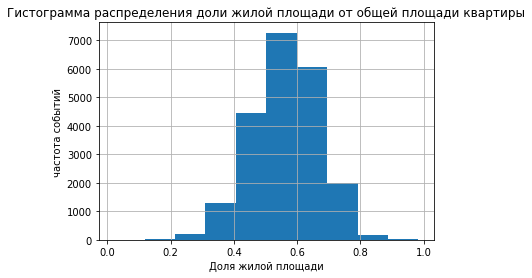

In [39]:
df_l_a['living_part'].hist()
plt.title('Гистограмма распределения доли жилой площади от общей площади квартиры')
plt.xlabel('Доля жилой площади')
plt.ylabel('частота событий')
plt.show();

Наибольшее количество значений приходится на диапазон от 0.3 до 0.8, то есть комнаты составляют от 30% до 80% общей площади. Для этого диапазона создали сводную таблицу и построили график зависимости медианного значения доли жилой площади от количества комнат.

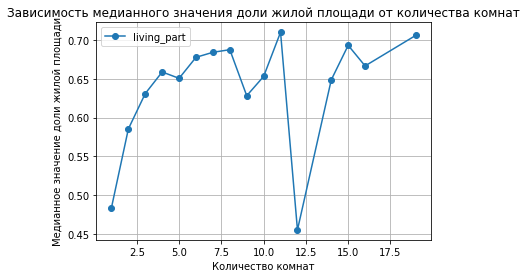

In [40]:
df_l_a.query('0.3 < living_part < 0.8').pivot_table(index='rooms', values='living_part', aggfunc='median').plot(style='o-', grid=True)
plt.title('Зависимость медианного значения доли жилой площади от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Медианное значение доли жилой площади')
plt.show();

In [41]:
df.query('rooms == 12') # ознакомились с объявлением о 12 комнатной квартире с очень маленькой долей жилой площади

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19540,8,420000000.0,900.0,2017-12-06T00:00:00,12,2.8,25.0,409.7,25,False,...,112.0,NaN,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0


Квартира,состоящая из 12 комнат встречется в базе данных однажды, общая площадь 900 метров, жилая площадь указана и составляет 409.7 метра, 25-й этаж 25-этажного дома. Хорошая квартира. Спортивный зал, бассейн и зимний сад не входят в жилую площадь. Этот уникальный случай не должен влиять на результаты заполнения пропусков в данных о жилой площади. 

In [42]:
df_area = df_l_a.query('0.3 < living_part < 0.8').pivot_table(index='rooms', values='living_part', aggfunc=['median', 'count'])
display(df_area) # таблица число комнат и медиана доли жилой площади для указанного числа комнат

,median,count
,living_part,living_part
rooms,,
1,0.483871,7171
2,0.585462,7170
3,0.631029,5256
4,0.658880,1062
5,0.650653,286
6,0.677778,93
7,0.684242,52
8,0.687589,11


C ростом числа комнат до 8, доля жилой площади растёт, квартиры с количеством комнат больше 4 являются редкими или даже эксклюзивными. Заполнили пропуски в сведениях о жилой площади умножив значение общей площади на медианное значение доли жилой площади living_part для соответствующего числа комнат от 0 до 4 комнат, в остальных случаях применили медианное значение для всех оставшихся вариантов.

In [43]:
df_area.query('rooms >= 4 and rooms != 12')['median'].median()# медиана доли жилой площади для всех случаев, 
# когда комнат больше 4, за исключением 12

living_part    0.672222
dtype: float64

Заполнили пропуски в данных о жилой площади исходя из количества комнат и медианного значения доли жилой площади для такого типа квартир. 

In [44]:
df.loc[(df['living_area'].isna()) & (df['rooms'] == 1), 'living_area'] = df['total_area']*0.48                                    
df.loc[(df['living_area'].isna()) & (df['rooms'] == 2), 'living_area'] = df['total_area']*0.59
df.loc[(df['living_area'].isna()) & (df['rooms'] == 3), 'living_area'] = df['total_area']*0.63
df.loc[(df['living_area'].isna()) & (df['rooms'] == 4), 'living_area'] = df['total_area']*0.66
df.loc[(df['living_area'].isna()) & (df['rooms'] > 4), 'living_area'] = df['total_area']*0.67
df['living_area'].isna().sum() # количество пропусков в жилой площади       

0

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23553 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23553 non-null  int64  
 1   last_price            23553 non-null  float64
 2   total_area            23553 non-null  float64
 3   first_day_exposition  23553 non-null  object 
 4   rooms                 23553 non-null  int64  
 5   ceiling_height        23553 non-null  float64
 6   floors_total          23553 non-null  float64
 7   living_area           23553 non-null  float64
 8   floor                 23553 non-null  int64  
 9   is_apartment          23553 non-null  bool   
 10  studio                23553 non-null  bool   
 11  open_plan             23553 non-null  bool   
 12  kitchen_area          21546 non-null  float64
 13  balcony               12086 non-null  float64
 14  locality_name         23553 non-null  object 
 15  airports_nearest   

In [46]:
df.query('total_area < (living_area + kitchen_area)').shape

(77, 22)

**Все пропущенные значения в сведениях о жилой площади заполнены**. Общая площадь была указана во всех объявлениях. Исходя из этого по имеющимся данным расчитали медианное значение доли жилой площади в общей площади квартиры для квартир с одинаковым количеством комнат и умножили величину общей площади на полученный коэффициент. Из расчета предварительно исключили квартиры-студии и квартиры с открытой планировкой, для них пропущенные значения жилой площади установили равными нулю.

**Сведения о площади кухни**

Площадь кухни количественная переменная, её величина влияет на стоимость квартиры. Боьшая кухня - это хорошо. В квартирах-студиях и квартирах со свободной планировкой площадь кухни не выделяется. Пропуски в этой категории квартир уже заменили на 0 при заполнении пропусков в жилой площади. Если из общей площади квартиры вычесть жилую площадь, то в остатке будет кухня + коридоры + ванные + гардеробные или кладовки, иными словами размер кухни будет сильно завышен, что исказит сведения о продаваемом объекте. Достоверно установить площадь кухни можно по серии проекта, по которму построен дом, или исходя из года постройки дома. В нашем распоряжении есть только один параметр, который косвенно может об этом свидетельствовать. Предположили, что дома 5 и 9 этажей являются типичными представителями массовой советской застройки, в которых размер кухни составлял плюс/минус 6 метров, независимо от количества комнат и размеров квартиры. 

In [47]:
df_k_a = df.query('studio == False and open_plan == False') # исключили из рассмотрения студи и открытую планировку

df_k_a = df_k_a[['total_area', 'floors_total', 'living_area', 'kitchen_area']]
df_k_a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23340 entries, 0 to 23698
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   total_area    23340 non-null  float64
 1   floors_total  23340 non-null  float64
 2   living_area   23340 non-null  float64
 3   kitchen_area  21333 non-null  float64
dtypes: float64(4)
memory usage: 911.7 KB


In [48]:
df_kitchen = df_k_a.pivot_table(index = 'floors_total', values = 'kitchen_area', aggfunc =['median', 'count'])
df_kitchen

,median,count
,kitchen_area,kitchen_area
floors_total,,
1.0,9.10,19
2.0,7.00,346
3.0,8.50,592
4.0,9.80,1073
5.0,7.00,5248
6.0,11.00,845
7.0,10.70,546
8.0,12.55,356


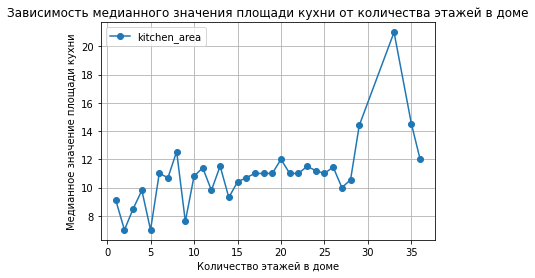

In [49]:
df_k_a.pivot_table(index = 'floors_total', values = 'kitchen_area', aggfunc = 'median').plot(style='o-', grid=True)
plt.title('Зависимость медианного значения площади кухни от количества этажей в доме')
plt.xlabel('Количество этажей в доме')
plt.ylabel('Медианное значение площади кухни')
plt.show();

Из сводной таблицы и графика сделали вывод, что для 2-х этажных и 5-этажных домов характерны маленькие кухни с медианным значением площади 7 метров, количество объявлений о продаже квартир в 5-ти этажных домах максимальное и составило 5755, это **типовые** дома, поэтому пропуски площади кухни в объявлениях о продаже квартир в пятиэтажках правомерно заменить на 7 метров.
Дома высотой  9 этажей тоже были **типовыми** в советский период, медианное значение размера кухни в них немного выше и составляет  7.6 метра, таких квартир  тоже продается очень много, поэтому там, где не указан размер кухни в 9-ти этажном доме, поставили 7,6 метра.
Дома с иным количеством этажей не являются типовыми, для устранения пропусков в остальных объявлениях взяли медианное значение по колонке `kitchen_area`, исключив специфические категории и редкие случаи продажи квартир в домах выше 26 этажей. 

In [50]:
df_kitchen.query('floors_total < 26 and floors_total not in (2, 5, 9)')['median'].median()# медиана площади кухни для всех случаев, 
# когда в доме меньше 26 этажей, но не 2, 5, 9

kitchen_area    11.0
dtype: float64

Заполнили пропуски в площади кухни на медианные значения, характерные для домов 2, 5 и 9 этажей, для остальных объявлений заполнили пропуски медианным значением 11.0

In [51]:
df.loc[(df['kitchen_area'].isna()) & ((df['floors_total'] == 2) | (df['floors_total'] == 5)), 'kitchen_area'] = 7.00
df.loc[(df['kitchen_area'].isna()) & (df['floors_total'] == 9), 'kitchen_area'] = 7.60
df['kitchen_area'] = df['kitchen_area'].fillna(11.0)  
df['kitchen_area'].count() # результат обработки данных о площади кухни. 

23553

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23553 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23553 non-null  int64  
 1   last_price            23553 non-null  float64
 2   total_area            23553 non-null  float64
 3   first_day_exposition  23553 non-null  object 
 4   rooms                 23553 non-null  int64  
 5   ceiling_height        23553 non-null  float64
 6   floors_total          23553 non-null  float64
 7   living_area           23553 non-null  float64
 8   floor                 23553 non-null  int64  
 9   is_apartment          23553 non-null  bool   
 10  studio                23553 non-null  bool   
 11  open_plan             23553 non-null  bool   
 12  kitchen_area          23553 non-null  float64
 13  balcony               12086 non-null  float64
 14  locality_name         23553 non-null  object 
 15  airports_nearest   

**Все пропуски в сведениях о площади кухни заполнены.**  Расчитали медианные значения метрики по заполненным строкам в зависимости от количества этажей в доме. Из расчета предварительно исключили квартиры-студии и квартиры с открытой планировкой, для них пропущенные значения площади кухни установили равными нулю. 

Проверили логическое соотношение, чтобы общая площадь не оказалась меньше суммы жилой площади и площади кухни. Если общая площадь квартиры равна сумме жилой площади и площади кухни, то можно предположить удобства на этаже или во дворе, видела я в СПБ ванны, установленные на кухне между плитой и холодильником. Но общая площадь не может быть меньше суммы площадей кухни и комнат.

In [53]:
df.query('total_area < (living_area + kitchen_area)').shape

(223, 22)

**Балконы**

Наличие балкона является преимуществом квартиры, его отсутствие рассматривается потенциальными покупателями при прочих равных условиях, как недостаток. Следовательно, продавец не включит в объявление сведения о наличии балконов только при их отсутсвии. Поэтому все пропуски в столбце balcony закономерно заменили на "0".

In [54]:
df['balcony'] = df['balcony'].fillna(0) # заменили все пропущенные значения на 0
df['balcony'].isna().sum() # проверили результат

0

Далее следуют столбцы, содержащие сведения, полученые автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. Заполнять пропуски в них, не владея данными об адресах квартир, невозможно. Из всех этих параметров существенное влияние на рыночную цену квартиры оказывает расстояние до центра города cityCenters_nearest, причём только для Санкт-Петербурга, но и для этого параметра заполнение пропусков без знания адреса объектов бессмысленно, надо будет работать с тем, что есть. Облегчили датафрейм, избавившись от столбцов, которые не будем использовать в анализе: количество фотографий, расстояние до аэропорта, до парка, до водоёма

In [55]:
df.drop(columns=['total_images', 'airports_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23553 entries, 0 to 23698
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   last_price            23553 non-null  float64
 1   total_area            23553 non-null  float64
 2   first_day_exposition  23553 non-null  object 
 3   rooms                 23553 non-null  int64  
 4   ceiling_height        23553 non-null  float64
 5   floors_total          23553 non-null  float64
 6   living_area           23553 non-null  float64
 7   floor                 23553 non-null  int64  
 8   is_apartment          23553 non-null  bool   
 9   studio                23553 non-null  bool   
 10  open_plan             23553 non-null  bool   
 11  kitchen_area          23553 non-null  float64
 12  balcony               23553 non-null  float64
 13  locality_name         23553 non-null  object 
 14  cityCenters_nearest   18054 non-null  float64
 15  days_exposition    

Пропуски остались в параметре cityCenters_nearest "расстояние до центра", он важен для определения рыночной цены для Санкт-Петербурга. Проверили, сколько пропусков в этом столбце приходится на Санкт-Петербург. Для этого задали одновременно два условия: пропуск в cityCenters_nearestи название населенного пункта locality_name Санкт-Петербург.

In [56]:
df[(df['cityCenters_nearest'].isna()) & (df['locality_name'] == 'Санкт-Петербург')].count()  

last_price              60
total_area              60
first_day_exposition    60
rooms                   60
ceiling_height          60
floors_total            60
living_area             60
floor                   60
is_apartment            60
studio                  60
open_plan               60
kitchen_area            60
balcony                 60
locality_name           60
cityCenters_nearest      0
days_exposition         25
dtype: int64

In [57]:
df.query('locality_name == "Санкт-Петербург"').count() # всего объявлений о продаже в Санкт-Петербурге

last_price              15643
total_area              15643
first_day_exposition    15643
rooms                   15643
ceiling_height          15643
floors_total            15643
living_area             15643
floor                   15643
is_apartment            15643
studio                  15643
open_plan               15643
kitchen_area            15643
balcony                 15643
locality_name           15643
cityCenters_nearest     15583
days_exposition         13569
dtype: int64

Не заполнены сведения о расстоянии до центра в Санкт-Петербурге в 59 объявлениях из 15477, что составляет 0,38%. Пропуски в таком ничтожном количестве не помещают исследованию влияния расстояния до центра города на рыночную стоимость квартиры в Санкт-Петербурге.

Остались пропуски в столбце days_exposition "сколько дней было размещено объявление (от публикации до снятия)". Исходя из того, что колонка last_price "цена на момент снятия с публикации" была полностью заполнена в исходных данных, делаем вывод, что все представленные объявления сняты с публикации и пропусков в колонке days_exposition быть не должно, но они есть и их больше 13%. Заполнить пропуски в этой метрике, не исказив картину невозможно, слишком много непредсказуемых субъективных факторов влияют на время продажи квартиры. Пока оставили их как есть.

На этом обработка пропущеных значений завершена. Пропущенные значения были обнаружены в следующих параметрах:

- **высота потолка** количественная переменная влияет на привлекательность квартиры, пропуски составили 38.8% и были заполнены медианными значениями, характерными для домов разной этажности;
- **жилая площадь** очень важная характеристика квартиры, пропуски составляли 8%, заполнили исходя из медианных значений доли жилой площади в общей площади с учетом количества комнат и типа квартиры;
- **всего этажей** пропуски составляли 0.36%, удалили строки с пропусками в этом столбце методом dropna,
- **апартаменты** количество пропусков было 88.2%, тип данных object, кроме пропусков в столбце были значения False и True, тип данных заменили на bool, все пропуски заменили на False, полагая, что продавец апартаментов обязательно об этом заявит, всего True в этом столбце встретилось 49 раз;
- **площадь кухни** сильно влияет на привлекательность квартиры, пропуски составляли 9.6%, заполняли пропуски исходя из количества этажей в доме, так как массовая застройка советского времени характеризуется маленькими кухнями независимо от размеров квартиры и количества комнат;
- **балкон** наличие балкона добавляет стоимости квартиры, пропуски составляли 48.6%, по аналогии с апартаментами заполнили все пропуски значением "0", так если балкон есть, то продавец обязательно это отметит, а если не отметил, то нет ни одного балкона;
- **название населенного пункта** пропуски составляли всего 0.2% и были удалены;
- ближайший аэропорт, расстояние от центра Города, парки ближе 3 км, расстояние до парка, водоёмы ближе 3 км, расстояние до водоёма все эти свдения получены автоматически на основе картографических данных, заполнять пропуски в них не имея сведений об адресах квартир невозможно;
- **всего дней экспозиции от подачи до снятия объявления** доля пропусков составляет 13.4%, заполнение столбца обусловлено снятием объявления. В документации не поясняется, по какой причине снято объявление, продавец отказался от сделки или заключен предварительный договор или сделка зарегистрирована.

Причиной появления пропусков в данных, вписаных пользователем, вероятно является небрежность пользователя, неполнота картографических данных может быть связана с отставанием заполнения картографических данных от роста новостроек.

###  Изменение типов данных

В процессе заполнения пропусков был изменён тип данных is_apartment апартаменты с object на bool. 

Данные о количестве этажей в доме, количестве балконов и количестве дней экспозиции по смыслу являются целыми числами, тип данных в столбцах float, поменя на целое числоint. Сведения о первом дне публикации объявления имеют тип данных object, следует преобразовать его в datetime

In [58]:
df['floors_total'] = df['floors_total'].astype('int')
df['balcony'] = df['balcony'].astype('int')

df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23553 entries, 0 to 23698
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   last_price            23553 non-null  float64       
 1   total_area            23553 non-null  float64       
 2   first_day_exposition  23553 non-null  datetime64[ns]
 3   rooms                 23553 non-null  int64         
 4   ceiling_height        23553 non-null  float64       
 5   floors_total          23553 non-null  int64         
 6   living_area           23553 non-null  float64       
 7   floor                 23553 non-null  int64         
 8   is_apartment          23553 non-null  bool          
 9   studio                23553 non-null  bool          
 10  open_plan             23553 non-null  bool          
 11  kitchen_area          23553 non-null  float64       
 12  balcony               23553 non-null  int64         
 13  locality_name   

In [59]:
#df['days_exposition'] = df['days_exposition'].astype('int')

Оставили days_exposition в формате float, метод astype() выдает ошибку на пропущеных значениях, а метод to_numeric() переводит в формат float. Он такой и есть.

Изменили типы данных в столбцах  is_apartment, floors_total, balcony, first_day_exposition

## Расчёты и добавление результатов в таблицу

In [60]:
df['price_meter'] = (df['last_price'] / df['total_area']/1000).round(0) # новый столбец "цена квадратного метра"
# в тысячах рублей с округлением до целого
df['last_price'] = (df['last_price'] / 1000).round(0) # стоимость квартиры выразили в тысячах рублей с округлением до целого.

In [61]:
df['living_part'] = (df['living_area'] / df['total_area']).round(2) #   "доля жилой площади"
df['kitchen_part'] = (df['kitchen_area'] / df['total_area']).round(2) #  "доля кухни"

In [62]:
# функция для категоризации этажа, на котором расположена квартира
def floor_cat(dataset):
    if dataset['floor'] == 1:
        return 'первый этаж'
    if dataset['floor'] == dataset['floors_total']:
        return 'последний этаж'
    return 'другое'
 
df['floor_group'] = df.apply(floor_cat, axis=1) # применили функцию  к таблице
df['floor_group'].value_counts()# проверили результат

другое            17317
последний этаж     3329
первый этаж        2907
Name: floor_group, dtype: int64

In [63]:
# новые столбцы с годом, месяцем, днем недели первой публикации заявления

df['time_year'] = df['first_day_exposition'].dt.year
df['time_month'] = df['first_day_exposition'].dt.month
df['time_weekday'] = df['first_day_exposition'].dt.week

/tmp/ipykernel_198/2831949587.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['time_weekday'] = df['first_day_exposition'].dt.week


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23553 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   last_price            23553 non-null  float64       
 1   total_area            23553 non-null  float64       
 2   first_day_exposition  23553 non-null  datetime64[ns]
 3   rooms                 23553 non-null  int64         
 4   ceiling_height        23553 non-null  float64       
 5   floors_total          23553 non-null  int64         
 6   living_area           23553 non-null  float64       
 7   floor                 23553 non-null  int64         
 8   is_apartment          23553 non-null  bool          
 9   studio                23553 non-null  bool          
 10  open_plan             23553 non-null  bool          
 11  kitchen_area          23553 non-null  float64       
 12  balcony               23553 non-null  int64         
 13  locality_name   

In [65]:
display(df.head())

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,locality_name,cityCenters_nearest,days_exposition,price_meter,living_part,kitchen_part,floor_group,time_year,time_month,time_weekday
0,13000.0,108.0,2019-03-07,3,2.70,16,51.00,8,False,False,...,Санкт-Петербург,16028.0,NaN,120.0,0.47,0.23,другое,2019,3,10
1,3350.0,40.4,2018-12-04,1,2.70,11,18.60,1,False,False,...,посёлок Шушары,18603.0,81.0,83.0,0.46,0.27,первый этаж,2018,12,49
2,5196.0,56.0,2015-08-20,2,2.55,5,34.30,4,False,False,...,Санкт-Петербург,13933.0,558.0,93.0,0.61,0.15,другое,2015,8,34
3,64900.0,159.0,2015-07-24,3,2.70,14,100.17,9,False,False,...,Санкт-Петербург,6800.0,424.0,408.0,0.63,0.07,другое,2015,7,30
4,10000.0,100.0,2018-06-19,2,3.03,14,32.00,13,False,False,...,Санкт-Петербург,8098.0,121.0,100.0,0.32,0.41,другое,2018,6,25


Рассчитали и добавили в таблицу следующие параметры:
 - **цена квадратного метра** `price_meter`, для чего разделили стоимость квартиры `last_price` на общую площадь `total_area`, стоимость и цену выразили в тысячах рублей и задали размерность 0 знаков после запятой, чтобы получить привычный вид цены на недвижимость;
 - **доля жилой площади** `living_part`и **доля площади кухни** `kitchen_part` расчитали путем деления соответствующих площадей на общую площадь квартиры, округлили полученные данные до двух знаков после запятой, получилось наглядно;
 - **группировка этажей** `floor_group`, для этого категоризировали сведения об этаже, на котором расположена квартира, выделив три группы "первый", "последний", "другие";
 - **год**, **месяц**, **день недели** подачи заявления получили преобразованием даты подачи заявления.

## Исследовательский анализ данных

### Исследование отдельных параметров

**Общая площадь**

In [66]:
df['total_area'].describe() # изучили сведения об общей площади продаваемой недвижимости

count    23553.000000
mean        60.330389
std         35.663690
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

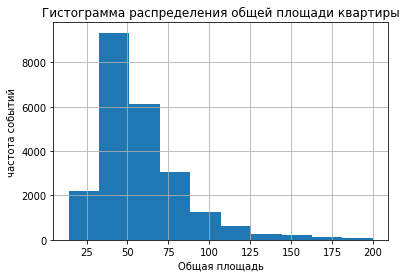

In [67]:
df['total_area'].hist(range=(14,200))
plt.title('Гистограмма распределения общей площади квартиры')
plt.xlabel('Общая площадь')
plt.ylabel('частота событий')
plt.show();

Больше всего выставлено на продажу квартир площадью от 30 до 50 метров, от 50 до 80 метров резкое снижение и затем плавно убывает количество объявлений до 200 метров. 

In [68]:
# для изучения удивительно маленьких и очень больших квартир создали исследовательскую таблицу 
df_research = df[['total_area', 'rooms', 'living_area', 'floor', 'studio', 'kitchen_area', 'locality_name']] #выбрали важные столбцы
display(df_research.sort_values('total_area').head(10)) #отсортировали по возрастанию общую площадь

,total_area,rooms,living_area,floor,studio,kitchen_area,locality_name
19904,12.0,1,10.000,2,False,7.0,Санкт-Петербург
19546,13.0,1,6.240,2,False,7.0,Санкт-Петербург
19807,13.0,1,10.000,3,False,7.0,Санкт-Петербург
17961,13.0,1,6.240,1,False,7.6,Санкт-Петербург
19558,13.2,1,6.336,1,False,7.0,Санкт-Петербург
19642,14.0,1,11.000,1,False,2.0,Санкт-Петербург
16949,15.0,1,7.200,1,False,7.6,Санкт-Петербург
12040,15.0,1,7.200,1,False,7.0,Сосновый Бор
8886,15.5,0,10.000,2,True,0.0,Санкт-Петербург
9412,16.0,0,13.000,1,False,0.0,Санкт-Петербург


In [69]:
display(df_research.sort_values('total_area', ascending=False ).head(20)) # оснакомились с самыми большими квартирами 

,total_area,rooms,living_area,floor,studio,kitchen_area,locality_name
19540,900.00,12,409.7000,25,False,112.00,Санкт-Петербург
12859,631.20,7,322.3000,4,False,19.50,Санкт-Петербург
3117,631.00,7,422.7700,5,False,60.00,Санкт-Петербург
15651,618.00,7,258.0000,5,False,70.00,Санкт-Петербург
5358,590.00,15,409.0000,3,False,100.00,Санкт-Петербург
4237,517.00,7,332.0000,3,False,22.00,Санкт-Петербург
8018,507.00,5,301.5000,7,False,45.50,Санкт-Петербург
15016,500.00,4,330.0000,7,False,11.00,Санкт-Петербург
5893,500.00,6,335.0000,7,False,40.00,Санкт-Петербург
12401,495.00,7,347.5000,7,False,25.00,Санкт-Петербург


Никаких отклонений не заметно, обычные большие квартиры, только кухоньки местами по 11 метров - маловаты, видимо есть приличные столовые, несколько сомнительно выглядит квартира площадью 413 метров с жилой площадью 74 метра и кухней - 14 метров, 235 метров на спортзал и бассейн?

**Цена квартиры**

In [70]:
df['last_price'].describe()

count     23553.000000
mean       6540.703774
std       10913.423326
min          12.000000
25%        3400.000000
50%        4646.000000
75%        6790.000000
max      763000.000000
Name: last_price, dtype: float64

Большинство обявлений попадают в человеческий диапазон от 3,45 млн руб. до 6,80 млн руб. Среднее значение 6,56 млн руб. значительно больше медианного 4,65 млн. Это вклад очень дорогих квартир. Удивительно выглядит минимальное значение 12 тысяч рублей - такого не бывает.

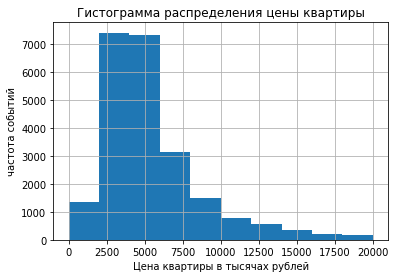

In [71]:
df['last_price'].hist(range=(0, 20000))
plt.title('Гистограмма распределения цены квартиры')
plt.xlabel('Цена квартиры в тысячах рублей')
plt.ylabel('частота событий')
plt.show();

Большинство сделок группируются в диапазоне цен от 2 до 6 млн руб., далее с ростом цен количество продаж резко снижается до 10 млн руб., и дальше плавно снижается, квартиры дороже 20 млн руб. уже редкость, но они существуют. Максимальная цена квартиры 763 млн рублей. Интересно, что можно купить дешевле 2 млн, а таких объявлений не мало.

In [72]:
df.query('last_price > 20000').shape # проверили количество объявлений 
#с ценой квартир больше 20000 тысяч рублей

(704, 23)

Обнаружили 695 квартир дороже  20 млн рублей. Посмотрели на самые дешевые квартиры

In [73]:
display(df.sort_values('last_price').head(10)) # отсортировали цену квартир по возрастанию, вывели самые дешёвые 

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,locality_name,cityCenters_nearest,days_exposition,price_meter,living_part,kitchen_part,floor_group,time_year,time_month,time_weekday
8793,12.0,109.0,2019-03-20,2,2.75,25,32.000,25,False,False,...,Санкт-Петербург,9176.0,8.0,0.0,0.29,0.37,последний этаж,2019,3,12
17456,430.0,30.4,2019-04-22,1,3.00,2,16.000,1,False,False,...,Сланцы,NaN,NaN,14.0,0.53,0.20,первый этаж,2019,4,17
14911,430.0,54.0,2018-06-26,2,3.00,3,31.860,3,False,False,...,посёлок станции Свирь,NaN,44.0,8.0,0.59,0.20,последний этаж,2018,6,26
16274,440.0,40.0,2018-07-10,1,2.55,5,19.200,1,False,False,...,деревня Старополье,NaN,45.0,11.0,0.48,0.18,первый этаж,2018,7,28
17676,450.0,36.5,2018-02-01,1,2.55,5,17.300,4,False,False,...,деревня Ям-Тесово,NaN,120.0,12.0,0.47,0.23,другое,2018,2,5
16219,450.0,38.5,2018-07-11,2,2.65,2,22.715,1,False,False,...,деревня Вахнова Кара,NaN,45.0,12.0,0.59,0.18,первый этаж,2018,7,28
5698,450.0,42.0,2017-07-31,2,3.00,1,23.000,1,False,False,...,городской посёлок Будогощь,NaN,233.0,11.0,0.55,0.14,первый этаж,2017,7,31
9581,450.0,43.4,2018-08-31,2,2.55,5,30.300,3,False,False,...,деревня Старополье,NaN,96.0,10.0,0.70,0.13,другое,2018,8,35
21912,470.0,37.0,2018-02-18,1,3.00,3,17.760,3,False,False,...,поселок Совхозный,NaN,45.0,13.0,0.48,0.30,последний этаж,2018,2,7
18867,470.0,41.0,2018-02-11,1,2.55,5,32.000,3,False,False,...,деревня Выскатка,NaN,46.0,11.0,0.78,0.22,другое,2018,2,6


Объявление о продаже за 12 тысяч рублей квартиры площадью 109 метров в 25 этажном доме в Санкт-Петербурге является полным бредом. Дальше следуют объявления о продаже квартир в сельской местности по ценам  от 430 тысяч рублей. Допустимые значения.
     Сомнительное объявление с ценой 12 тысяч рублей за квартиру 109 метров "провисело" 8 дней, была ли заключена сделка или его сняли с публикации за несоответствие - вопрос без ответа. 

**Количество комнат**

In [74]:
df['rooms'].value_counts() # количество продаваемых квартир по числу комнат 

1     7998
2     7892
3     5778
4     1172
5      325
0      194
6      104
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

Больше всего продают и покупают однокомнатные, двух-, трёх- и четырех- комнатные квартиры. Это не только потому, что у нас маленькие семьи, просто у нас маленькие доходы. Мало (192) объявлений о продаже квартир, в которых количество комнат равно нулю, сюда относятся студии и квартиры со свободной планировкой. Квартиры, в которых больше 5 комнат - штучные экземпляры.

**Высота потолка**

In [75]:
df['ceiling_height'].describe()# описание высоты потолков

count    23553.000000
mean         2.714303
std          0.238381
min          2.000000
25%          2.550000
50%          2.700000
75%          2.750000
max          6.000000
Name: ceiling_height, dtype: float64

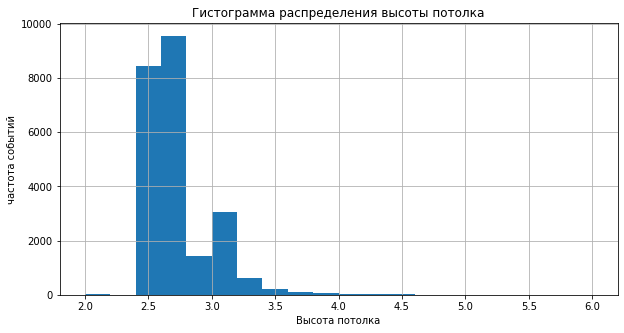

In [76]:
df['ceiling_height'].hist(bins=20, figsize=(10,5))
plt.title('Гистограмма распределения высоты потолка')
plt.xlabel('Высота потолка')
plt.ylabel('частота событий')
plt.show();

Массовое значение высоты потолка 2,5 метра и 2,7 метра, 3,2 метра уже редкость. Выше встречается в старинных домах или элитном новом жилье. Данные о высоте потолков подробно исследованы при заполнении пропусков в `ceiling_height` в разделе 2.1 Работа с пропусками. Там выявлены и устранены ошибки в заполнении, когда высота потолка во многих объявлениях была завышена в 10 раз, аномально низкие 1 метр и аномально высокие значения. 

**Время продажи квартиры**

Согласно документации колонка `days_exposition` — "сколько дней было размещено объявление (от публикации до снятия)", её будем считать временем продажи квартиры. Делаем допущение, что объявление снимается после заключения сделки, а объявления, отозванные продавцом исключены из базы данных. Если сделка не состоялась, то цена назначенная продавцом может быть очень далека от рыночной.

In [77]:
print(df['days_exposition'].isna().mean()) # доля пропущенных значений
df['days_exposition'].describe() #  описание параметра

0.13463253088778498


count    20382.000000
mean       180.745020
std        219.762908
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Первые 25% сделок совершены за 45 дней, для следующей четверти понадобилось 50 дней, третья четверть набиралась 137 дней, а оставшиеся 25% растянулись на 1348 дней.

Самая быстрая сделка заключена в день подачи объявления, самая долгая продажа заняла больше 4-х лет, медианное значение 95 дней около трех месяцев, среднее значение превышает медианное в 2 раза за счет выбросов в большую сторону.

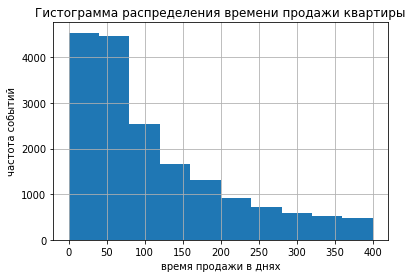

In [78]:
df['days_exposition'].hist(range=(0, 400)); # распределение длительности продажи
plt.title('Гистограмма распределения времени продажи квартиры')
plt.xlabel('время продажи в днях')
plt.ylabel('частота событий')
plt.show();

Форма гистограммы похожа на экспоненту, от максимального значения продаж, завершенных в диапазоне от 0 до 75 дней. Количество заключенных сделок сначала (от 75 до 150 дней) стремительно снижается, а затем всё более плавно снижается и очень медленно приближается к нулю.

Слишком быстрых сделок нет, просто быстрые сделки в тренде, рынок недвижимости в Санкт-Петербурге и пригородах очень динамичный. Возможно длинное время продажи характерно для эксклюзивных объектов, проверили это предположение, посмотрели самые долгие продажи

In [79]:
display(df.sort_values('days_exposition', ascending=False ).head())# самые долгие продажи

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,locality_name,cityCenters_nearest,days_exposition,price_meter,living_part,kitchen_part,floor_group,time_year,time_month,time_weekday
18843,3500.0,48.20,2014-12-15,2,2.50,5,27.40,2,False,False,...,деревня Новое Девяткино,NaN,1580.0,73.0,0.57,0.16,другое,2014,12,51
1109,34879.0,95.80,2014-12-09,2,3.00,6,58.30,5,True,False,...,Санкт-Петербург,318.0,1572.0,364.0,0.61,0.21,другое,2014,12,50
9553,10600.0,80.00,2014-12-09,3,2.85,17,44.00,9,False,False,...,Санкт-Петербург,17110.0,1553.0,132.0,0.55,0.19,другое,2014,12,50
1885,13300.0,79.60,2014-12-09,2,3.00,8,42.70,7,False,False,...,Санкт-Петербург,11096.0,1513.0,167.0,0.54,0.23,другое,2014,12,50
6691,4400.0,42.98,2014-12-12,1,2.55,5,18.72,1,False,False,...,Пушкин,30358.0,1512.0,102.0,0.44,0.26,первый этаж,2014,12,50


Квартиры, которые продавались очень долго объединяет только одно, объявления были опубликованы в конце 2014 года. Проверим взаимосвязь даты опубликования объявления и времени продажи.

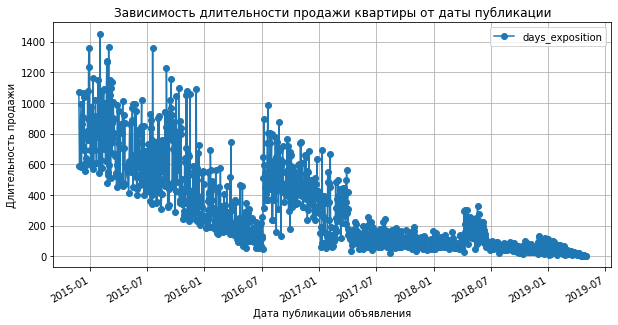

In [80]:
df.pivot_table(index='first_day_exposition', values='days_exposition', aggfunc='median').plot(style='o-', grid=True, figsize=(10, 5))
plt.title('Зависимость длительности продажи квартиры от даты публикации')
plt.xlabel('Дата публикации объявления')
plt.ylabel('Длительность продажи')
plt.show();

 График отражает колебания активности рынка недвижимости. В конце 2014 года рынок жилой недвижимости был очень вялым, время продажи квартиры колебалось в большом диапазоне от 600 до 1400 дней (от полутора до 4-х лет). Например, квартиру выставили на продажу в конце 2014 года, а продали в 2018 году.
   До завершения полугодия 2016 года рынок оживал, время продажи квартиры прямопропорционально уменьшалось и разброс значений времени продаж сокращался (на 1 июля 2016 года время продажи в диапазоне от 0 до 200 дней). 
   В июле 2016 года наблюдается разрыв, время продажи подскочило, диапазон значений составил от 200 до 1000 дней.  
   За второе полугодие 2016 года рынок полностью восстановился, со второго полугодия 2018 года время продажи колеблется от 0 до 100 дней. 

Слишкои долгие продажи для первого полугодия 2017 года, например 600 дней, являлись самыми быстрыми для конца 2014 года, считать, что продажи прошли слишком быстро или слишком медленно можно только для конкретного периода подачи объявления. Провели более детальный анализ длительности продаж по периодам.

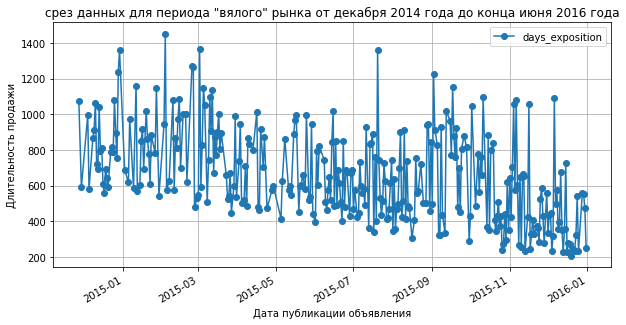

In [81]:
df.query('first_day_exposition <= 2016').pivot_table(index='first_day_exposition', values='days_exposition', aggfunc='median').plot(style='o-', grid=True, figsize=(10, 5))
plt.title('срез данных для периода "вялого" рынка от декабря 2014 года до конца июня 2016 года')
plt.xlabel('Дата публикации объявления')
plt.ylabel('Длительность продажи')
plt.show();

В 2015 году квартиры продавались очень долго, в начале года в лучшем случае 600 дней, а это больше полутора лет, некоторые и 4 года ждали своего часа. К концу года время продажи сократилось и оказалось в диапазоне от 200 до 600 дней.

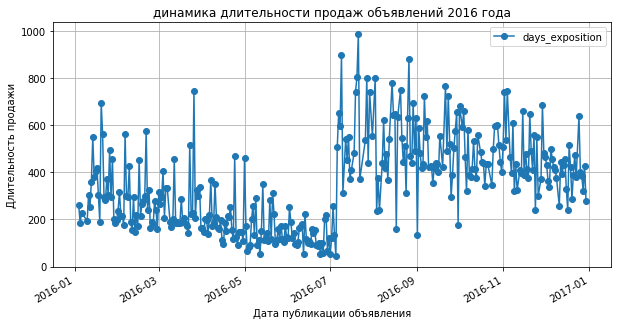

In [82]:
df.query('2016 <= first_day_exposition < 2017').pivot_table(index='first_day_exposition', values='days_exposition', aggfunc='median').plot(style='o-', grid=True, figsize=(10, 5)) 
plt.title('динамика длительности продаж объявлений 2016 года')
plt.xlabel('Дата публикации объявления')
plt.ylabel('Длительность продажи')
plt.show();

Время экспозиции объявления в первом полугодии 2016 года уверено снижалось, в начале июля что-то случилось. Быстрые продажи стали медленнее на 200 дней по сравнению с началом года.

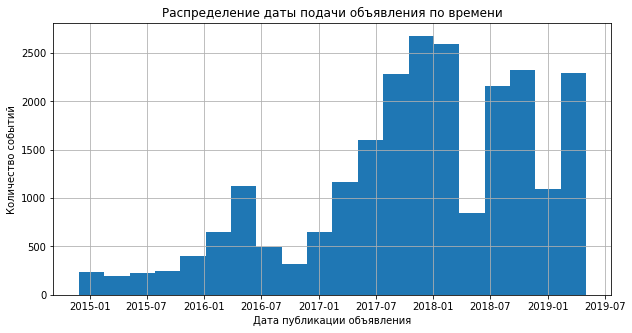

In [83]:
df['first_day_exposition'].hist(bins=20, figsize=(10,5))# распределение объявлений по времени подачи
plt.title('Распределение даты подачи объявления по времени')
plt.xlabel('Дата публикации объявления')
plt.ylabel('Количество событий')
plt.show();

По количеству объявлений тоже наглядно, что 2015 год рынок жилья спал, в 2016 начал рости, но во втором полугодии снова упал до значений 2015 года. Бурный рост в течение всего 2017 года, в конце 2016 объявлений было в 10 раз меньше. В 2018 и 2019 количество объявлений за различные месяцы показывает резкие колебания. 

Исследовали следующие параметры объявлений о продаже квартир;
* общая площадь `total_area`;
* цена квартиры `last_price`;
* количество комнат `rooms`;
* высота потолка `ceiling_height`;
* время продажи квартиры от даты публикации объявления до его снятия `days_exposition`

### Редкие и выбивающиеся значения

1. Высота потолка в некоторых объявлениях имела аномальные значения:
- потолок 1,75 метра и ниже, 3 объявления;
- потолок 8 метров и выше, 6 объявлений.

2. Сомнительные значения обнаружены при подсчете доли жилой площади, минимальное значение 2%, максимальное значение 100% допустимо при продаже комнат в комуналке.

3. В базе данных имеются объявления, в которых указаны нереальные величины жилой площади: 2, 3, 5 метров.

4. Редкими являются квартиры общей площадью от 200 до 900 кв.м.

5. Количество этажей в доме в 3 объявлениях оказалось слишком большим, максимальная высота жилиых домов в СПБ по данным сайта dominfospb.ru  36 этажей, дом расположен по адресу: проспект Обуховской обороны, 138, к.2. Объявления о продаже квартир в домах, в которых 37, 52, 60 этажей недостоверны.

6. Редкими являются объявления о продаже квартир дороже 20 млн рублей.

7. Одно  объявление о продаже квартиры в Санкт-Петербурге за 12 тысяч рублей совершенно нелепое

8. Количество комнат от 6 до 15 является редкостью.

9. В данных о времени продажи квартир обнаружили отсутствие данных о снятии обявлений, поданных в определенные промежутки времени.

### Факторы, влияющие на цену квартиры.

In [84]:
df_influence = df.query('last_price < 20000 & total_area < 100') # исключили самые дорогие и большие эксклюзивные квартиры
df_influence.head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,locality_name,cityCenters_nearest,days_exposition,price_meter,living_part,kitchen_part,floor_group,time_year,time_month,time_weekday
1,3350.0,40.4,2018-12-04,1,2.70,11,18.600,1,False,False,...,посёлок Шушары,18603.0,81.0,83.0,0.46,0.27,первый этаж,2018,12,49
2,5196.0,56.0,2015-08-20,2,2.55,5,34.300,4,False,False,...,Санкт-Петербург,13933.0,558.0,93.0,0.61,0.15,другое,2015,8,34
5,2890.0,30.4,2018-09-10,1,2.70,12,14.400,5,False,False,...,городской посёлок Янино-1,NaN,55.0,95.0,0.47,0.30,другое,2018,9,37
6,3700.0,37.3,2017-11-02,1,2.70,26,10.600,6,False,False,...,посёлок Парголово,19143.0,155.0,99.0,0.28,0.39,другое,2017,11,44
7,7915.0,71.6,2019-04-18,2,2.70,24,42.244,22,False,False,...,Санкт-Петербург,11634.0,NaN,111.0,0.59,0.26,другое,2019,4,16


Для исследования влияния различных параметров на цену квартиры создали срез, в который вошли квартиры не дороже 20 млн руб. и не больше 100 квадратных метров

**Влияние общей площади на цену квартиры**

Для оценки влияния различных факторов использовали не сумму сделки, а цену квадратного метра. Использовали диаграмму рассеяния и корреляцию параметров для установления их взаимного влияния

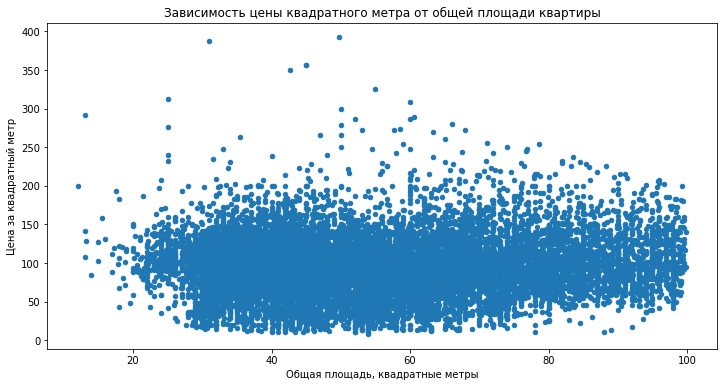

In [85]:
df_influence.sort_values('price_meter').plot(x='total_area', y='price_meter', kind='scatter', figsize=(12,6))
plt.title('Зависимость цены квадратного метра от общей площади квартиры')
plt.xlabel('Общая площадь, квадратные метры')
plt.ylabel('Цена за квадратный метр')
plt.show();

In [86]:
df_influence['price_meter'].corr(df_influence['total_area'])# коэффициент Пирсона для окончательной цены
# общей площади

0.03712679253043748

Диаграмма рассеяния для цены квадратного метра в зависимости от общей площади квартиры показывает, что минимальные значения цены для маленьких квартир до 30 метров с увеличением площади уменьшается, от 30 до 60 метров нижняя граница цены квадратного метра практически не изменяется. Для больших квартир с ростом площади максимальная цена квадратного метра снижается и уменьшается разброс значений. В массовом диапазоне квартир площадью до 100 метров, зависимость цены квадратного метра от площади не выявлена, о чем свидетельствует маленькое значение коэффициента Пирсона.

**Количество комнат**

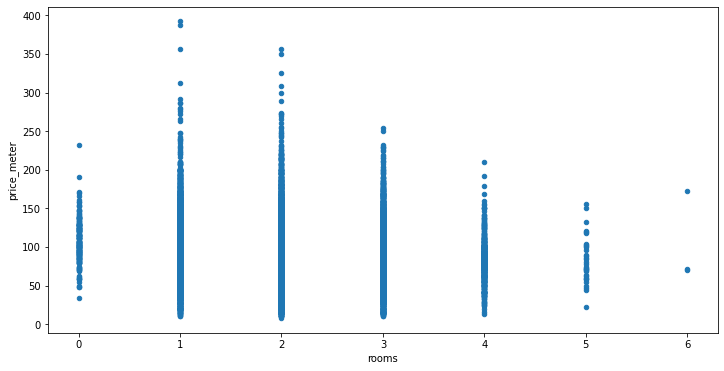

In [87]:
df_influence.sort_values('price_meter').plot(x='rooms', y='price_meter', kind='scatter', figsize=(12,6));

Диаграмма показала, что самый дорогой квадратный метр в однокомнатных квартирах, но и самый дешевый тоже в однокомнатных, диапазон от нескольких тысяч до 400 тысяч рублей за квадратный метр.

Далее с ростом числа комнат максимальная цена квадратного метра снижается, разброс цен для каждой категории сокращается. Квартиры, в которых 0 комнат, это в основном студии, в них максимальная цена одного метра меньше, чем в однокомнатных квартирах, но минимальная цена квадратного метра в студиях несколько выше, чем в однокомнатных квартирах, потому что студии в новых домах, а дешевые однокомнатные квартиры в старых неремонтированных домах.

In [88]:
df_influence['price_meter'].corr(df_influence['rooms'])# коэффициент Пирсона зависимости цены квадратного метра от количества комнат

-0.16838238848030865

Отрицательное значение коэффициента Пирсона свидетельствует, что с ростом числа комнат цена квадратного метра снижается, маленькая величина коэффициента определяется тем, что зависимость нелинейная.

**Удалённость от центра**

Фактор удалённости от центра влияет на цену квадратного метра жилья для квартир в Санкт-Петербурге, для пригородов этот фактор не актуален.

<AxesSubplot:xlabel='cityCenters_nearest', ylabel='price_meter'>

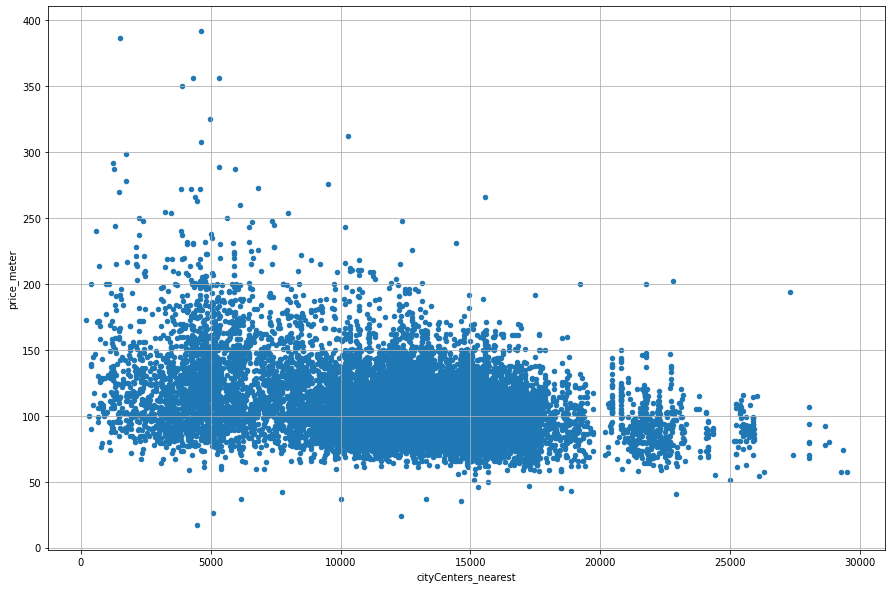

In [89]:
df_influence.query('locality_name == "Санкт-Петербург"').sort_values('price_meter').plot(x='cityCenters_nearest', y='price_meter', kind='scatter', grid=True, figsize=(15,10))

#  зависимость цены квадратного метра и удалённости от центра исследуем только для Санкт-Петербурга

In [90]:
df_influence.query('locality_name == "Санкт-Петербург"')['price_meter'].corr(df_influence['cityCenters_nearest'])# коэффициент Пирсона 

-0.3572521347735377

С увеличением расстояния от центра стоимость квадратного метра снижается в верхних ценовых категориях, минимальные значения практически не зависят от расстояния до центра, составляют приблизительно от 75 до 100 тысяч за квадрат. Отрицательное значение коэффициента Пирсона свидетельствует о том, что чем дальше от центра, тем дешевле, но зависимость незначительная.

**Этаж**

Этаж, на котором располагается квартира, в исследуемой базе данных принимает значения от 1 до 36. Для анализа влияния на цену квартиры мы выделили 3 типа этажей. Первый и последний этажи имеют недостатки, которых нет в других случаях. На первом этаже шумно, возможно проникновение запахов, сырости, насекомых из подвала, на последнем этаже возможны протечки крыши. Все остальные этажи лишены перечисленных недостатков.

In [91]:
df_influence.pivot_table(index = 'floor_group', values = 'price_meter', aggfunc = 'median')

,price_meter
floor_group,
другое,97.0
первый этаж,81.0
последний этаж,86.0


При прочих равных условиях покупатели предпочитают не первый и не последний этажи, что отражается на цене квадратного метра: медианная цена квартиры на первом этаже 81 тысяча, на последнем 86 тысяч, в других случаях 97 тысяч рублей за квадратный метр общей площади.

**Дата размещения объявления**

Влиять на цену может год начала продаж, потому что активность рынка меняется и цены меняются со временем.

Месяц подачи объявления с меньшей вероятностью может влиять на длительность продаж, в начале осени продажи идут активнее всего, летом мало кто занимается такими делами.

День недели врядли отразится на цене, может немного на скорости продажи.

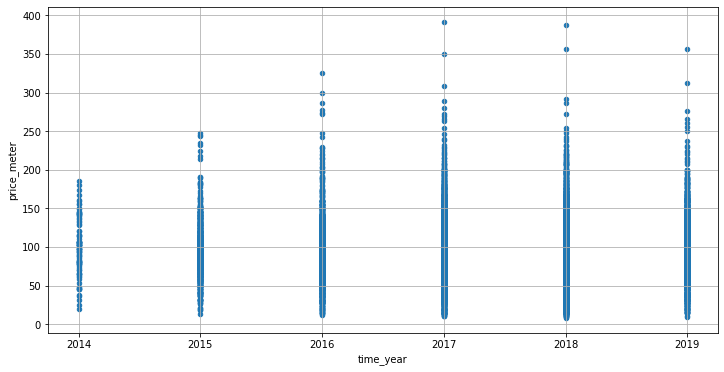

In [92]:
# изменение цены квадратного метра по годам
df_influence.sort_values('price_meter').plot(x='time_year', y='price_meter', kind='scatter', figsize=(12,6), grid=True);

При анализе изменения цены жилья по годам имеем в виду, что за 2014 год сведения только из объявлений, опубликованных за последние 2 месяца, а в 2019 году только за первые 5 месяцев, что видно в матрице диаграмм рассеяния. Корректно сравнить 2015, 2016, 2017 и 2018 годы. С 2015 по 2017 годы цены на дорогие квартиры росли, возможно на рынке стало появляться больше элитного жилья, на дешевые квартиры цены практически не меняются, а по сравнению с 2014 годом дешевое жильё стало ещё дешевле.

<AxesSubplot:xlabel='time_month', ylabel='price_meter'>

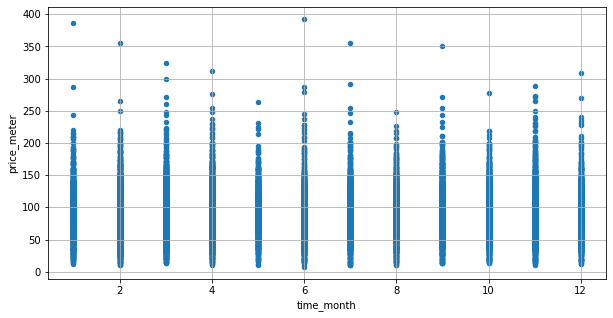

In [93]:
# влияние месяца подачи объявления на цену
df_influence.sort_values('price_meter').plot(x='time_month', y='price_meter', kind='scatter', figsize=(10,5), grid=True)

<AxesSubplot:xlabel='time_weekday', ylabel='price_meter'>

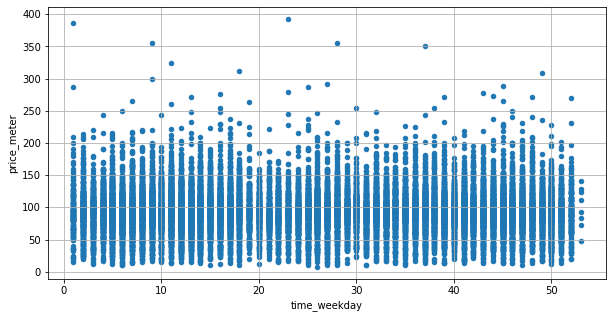

In [94]:
# влияние дня подачи заявления на цену
df_influence.sort_values('price_meter').plot(x='time_weekday', y='price_meter', kind='scatter', figsize=(10,5), grid=True)

Месяц и день недели подачи объявления не влияют на цену продажи квартиры

**Влияние населенного пункта**

Лемматизаровали данные о населенных пунктах, посчитали частоту упоминания каждой леммы.

In [95]:
locality_lem = m.lemmatize(' '.join(df['locality_name']))

print(Counter(locality_lem))

Counter({' ': 28752, 'санкт-петербург': 15643, 'поселок': 2649, 'деревня': 943, 'муриный': 586, 'городской': 547, 'кудрово': 441, 'шушар': 439, 'всеволожск': 398, 'пушкин': 369, 'тип': 362, 'колпино': 338, 'парголовый': 327, 'гатчина': 307, 'выборг': 237, 'село': 207, 'петергоф': 201, 'красный': 187, 'новый': 186, 'сестрорецк': 183, 'девяткино': 143, 'сертолово': 142, 'ломоносов': 133, 'бугор': 113, 'сланцы': 112, 'волхов': 111, 'кириши': 110, 'сосновый': 105, 'кингисепп': 104, 'тосно': 104, 'бор': 101, 'кронштадт': 95, 'никольское': 94, '-': 91, 'коммунар': 90, 'кировск': 84, 'отрадный': 79, 'старый': 75, 'янино': 68, '1': 68, 'металлострой': 66, 'приозерск': 66, 'луг': 61, 'шлиссельбург': 57, 'имя': 53, 'тихвин': 49, 'стрельна': 43, 'тельман': 41, 'большой': 40, 'павловск': 38, 'рощино': 38, 'романовка': 37, 'волосово': 36, 'свердлов': 36, 'кузьмоловский': 35, 'мга': 32, 'сиверский': 29, 'кудровый': 29, 'ивангород': 28, 'малый': 28, 'новоселье': 27, 'сясьстрой': 24, 'зеленогорск': 24

Выбрали первые 10 чаще всего упоминаемых населенных пункта: Санкт-Петербург 15517, Мурино 552, Шушары 435, Кудрово 424, Всеволожск 393, Пушкин 369, Колпино 336, Парголово 325, Гатчина 303, Выборг 235.

In [96]:
sorted(df['locality_name'].unique()) # выстроили уникальные названия по алфавиту, не очень они уникальные

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'городск

In [97]:
# переименуем повторяющиеся в разных вариант названия
df.loc[(df['locality_name'] == "посёлок Шушары"), 'locality_name'] = 'Шушары'
df.loc[(df['locality_name'] == "посёлок Парголово"), 'locality_name'] = 'Парголово'
df.loc[(df['locality_name'] == "деревня Кудрово"), 'locality_name'] = 'Кудрово'
df.loc[(df['locality_name'] == "поселок Мурино") | (df['locality_name'] == "посёлок Мурино"), 'locality_name'] = 'Мурино'
display(df['locality_name'].value_counts().head(10)) # отсортировали названия по количеству обявлений

Санкт-Петербург    15643
Мурино               586
Кудрово              470
Шушары               439
Всеволожск           398
Пушкин               369
Колпино              338
Парголово            327
Гатчина              307
Выборг               237
Name: locality_name, dtype: int64

In [98]:
df_top = df.query('locality_name in ("Санкт-Петербург", "Мурино", "Шушары", "Кудрово", "Всеволожск", "Пушкин", "Колпино", "Парголово", "Гатчина", "Выборг")')
df_top.pivot_table(index = 'locality_name', values = 'price_meter').sort_values('price_meter') # сводная таблица средней цены метра в выбраных населенных пунктах

,price_meter
locality_name,
Выборг,58.097046
Всеволожск,68.645729
Гатчина,68.749186
Колпино,75.428994
Шушары,78.574032
Мурино,86.030717
Парголово,90.140673
Кудрово,95.289362
Пушкин,103.121951


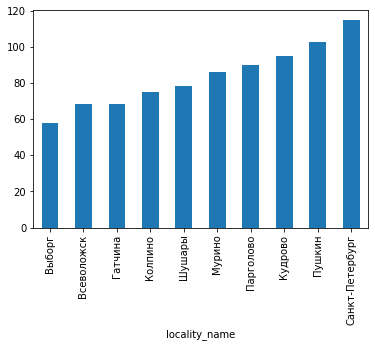

In [99]:
df_top.groupby('locality_name')['price_meter'].agg('mean').sort_values().plot(kind='bar'); # наглядно сравнивать цены на столбчатой диаграмме           

Ожидаемо самый дорогой квадратный метр жилья в Санкт-Петербурге 120 тысяч рублей, самый дешевый из рассмотренных в Выборге ниже 60 тысяч рублей, в 2 раза дешевле. Из представленных на графике населенных пунктов Выборг находится дальше всех от Санкт-Петербурга.Чем ближе к мегаполису, тем выше цена.

**Где начинается центр?**

In [100]:
# создали локальный датасет для исследования влияния на цену расстояния до центра города
df_city = df.query('locality_name == "Санкт-Петербург"')[['cityCenters_nearest', 'price_meter']]
df_city['cityCenters_nearest'] = (df_city['cityCenters_nearest']/1000).round(0) # выразили расстояние в километрах и целых числах
df_city.info()
display(df_city.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15643 entries, 0 to 23697
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   cityCenters_nearest  15583 non-null  float64
 1   price_meter          15643 non-null  float64
dtypes: float64(2)
memory usage: 366.6 KB


,cityCenters_nearest,price_meter
0,16.0,120.0
2,14.0,93.0
3,7.0,408.0
4,8.0,100.0
7,12.0,111.0


In [101]:
df_city = df_city.dropna(subset = ['cityCenters_nearest']) #удалили строки с пропусками в столбце с расстоянием
df_city.describe()

,cityCenters_nearest,price_meter
count,15583.000000,15583.000000
mean,11.582750,114.682025
std,4.854665,52.310963
min,0.000000,0.000000
25%,8.000000,91.000000
50%,12.000000,105.000000
75%,15.000000,124.000000
max,29.000000,1908.000000


In [102]:
df_city['cityCenters_nearest'] = df_city['cityCenters_nearest'].astype('object')# поменяли тип данных о расстоянии с `float` `object` 
df_city.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15583 entries, 0 to 23697
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   cityCenters_nearest  15583 non-null  object 
 1   price_meter          15583 non-null  float64
dtypes: float64(1), object(1)
memory usage: 365.2+ KB


In [103]:
df_city.pivot_table(index = 'cityCenters_nearest', values = 'price_meter') # средняя цена для каждого километра

,price_meter
cityCenters_nearest,
0.0,245.888889
1.0,177.010417
2.0,157.854839
3.0,121.488506
4.0,133.289244
5.0,140.448087
6.0,151.012945
7.0,156.173810
8.0,124.866779


Средняя цена квадратного метра жилья на нулевом километре имеет максимальное значение 246 тысяч рублей за квадратный метр. Чтобы проследить динамику изменения построили график.

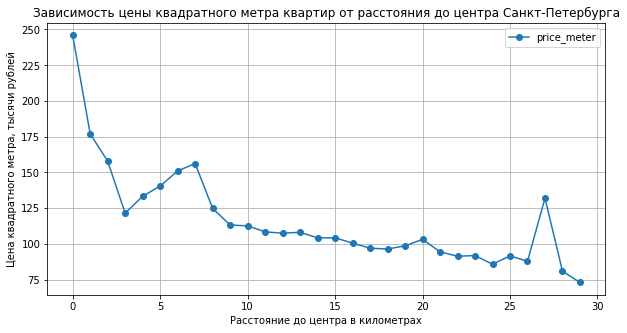

In [104]:
df_city.pivot_table(index = 'cityCenters_nearest', values = 'price_meter').plot(style='o-', figsize=(10,5), grid=True)
plt.title('Зависимость цены квадратного метра квартир от расстояния до центра Санкт-Петербурга')
plt.xlabel('Расстояние до центра в километрах')
plt.ylabel('Цена квадратного метра, тысячи рублей')
plt.show();

Средняя цена квадратного метра стремительно снижается с нулевого до 3-его километра, дальше плавно растет до 7-ого километра и снова быстро падает до 9-ого километра. Эти колебания объяснимы. Квартиры в самом-самом центре ценяться за престиж, чуть дальше уже не так круто, а неудобства жизни в центре все в наличии: толпы людей, пробки машин, шум и прочие прелести. А немного подальше "тихий центр", он дороже. Больше 7-ми километров - уже не центр, с 8 до 9 км цены падают с 160 до 115 тысяч рублей, дальше колебания цены с ростом расстояния от центра незначительные, остановкой ближе - остановкой дальше, большой роли не играет. Граница проходит на 7-м километре. Выброс на 27-м километре скорее всего обусловлен продажей дорогого элитного загородного жилья.

**Центровые квартиры**

In [105]:
df_centr = df.query('locality_name == "Санкт-Петербург" & cityCenters_nearest <= 7000') # сегмент квартир в центре
df_centr.info() # выделели 3298 объявлений   

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3298 entries, 3 to 23694
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   last_price            3298 non-null   float64       
 1   total_area            3298 non-null   float64       
 2   first_day_exposition  3298 non-null   datetime64[ns]
 3   rooms                 3298 non-null   int64         
 4   ceiling_height        3298 non-null   float64       
 5   floors_total          3298 non-null   int64         
 6   living_area           3298 non-null   float64       
 7   floor                 3298 non-null   int64         
 8   is_apartment          3298 non-null   bool          
 9   studio                3298 non-null   bool          
 10  open_plan             3298 non-null   bool          
 11  kitchen_area          3298 non-null   float64       
 12  balcony               3298 non-null   int64         
 13  locality_name    

In [106]:
df_centr.describe() #описание числовых параметров квартир в центре

,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,cityCenters_nearest,days_exposition,price_meter,living_part,kitchen_part,time_year,time_month,time_weekday
count,3298.000000,3298.000000,3298.000000,3298.000000,3298.000000,3298.000000,3298.000000,3298.000000,3298.000000,3298.000000,2743.000000,3298.000000,3298.000000,3298.000000,3298.000000,3298.000000,3298.000000
mean,14959.745907,94.104145,2.860825,2.996968,6.890540,56.109461,4.084597,14.080094,0.306246,4345.817768,251.326650,144.791692,0.584015,0.169363,2017.173135,6.421164,26.135233
std,24690.544252,60.163288,1.469652,0.365093,3.643812,39.660185,2.815820,8.934784,0.746784,1552.155639,277.552184,93.972395,0.113261,0.086439,1.127878,3.468739,15.082924
min,1600.000000,12.000000,0.000000,2.400000,2.000000,0.000000,1.000000,0.000000,0.000000,181.000000,3.000000,15.000000,0.000000,0.000000,2014.000000,1.000000,1.000000
25%,6700.000000,57.550000,2.000000,2.700000,5.000000,31.800000,2.000000,9.000000,0.000000,3405.250000,60.000000,99.000000,0.520000,0.110000,2017.000000,3.000000,12.000000
50%,9300.000000,80.000000,3.000000,3.000000,6.000000,47.000000,4.000000,11.300000,0.000000,4599.000000,142.000000,123.000000,0.600000,0.150000,2017.000000,6.000000,26.000000
75%,14500.000000,110.350000,4.000000,3.170000,8.000000,68.000000,5.000000,16.000000,0.000000,5485.500000,353.500000,156.000000,0.660000,0.200000,2018.000000,10.000000,40.000000
max,763000.000000,631.200000,19.000000,6.000000,25.000000,422.770000,25.000000,107.000000,5.000000,6998.000000,1572.000000,1908.000000,0.980000,0.640000,2019.000000,12.000000,53.000000


In [107]:
df.describe() # описание числовых параметров исходной базы

,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,cityCenters_nearest,days_exposition,price_meter,living_part,kitchen_part,time_year,time_month,time_weekday
count,23553.000000,23553.000000,23553.000000,23553.000000,23553.000000,23553.000000,23553.000000,23553.000000,23553.000000,18054.000000,20382.000000,23553.000000,23553.000000,23553.000000,23553.000000,23553.000000,23553.000000
mean,6540.703774,60.330389,2.070904,2.714303,10.671125,34.678102,5.877765,10.375590,0.593597,14190.501994,180.745020,99.388613,0.564782,0.186988,2017.371036,6.400926,26.015285
std,10913.423326,35.663690,1.078712,0.238381,6.580057,22.825349,4.871066,5.737291,0.960362,8610.778743,219.762908,50.295506,0.103602,0.077888,1.037439,3.493352,15.193516
min,12.000000,12.000000,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,181.000000,1.000000,0.000000,0.000000,0.000000,2014.000000,1.000000,1.000000
25%,3400.000000,40.000000,1.000000,2.550000,5.000000,18.700000,2.000000,7.000000,0.000000,9238.000000,45.000000,77.000000,0.490000,0.130000,2017.000000,3.000000,12.000000
50%,4646.000000,52.000000,2.000000,2.700000,9.000000,30.000000,4.000000,9.200000,0.000000,13096.500000,95.000000,95.000000,0.570000,0.170000,2017.000000,6.000000,26.000000
75%,6790.000000,69.700000,3.000000,2.750000,16.000000,42.400000,8.000000,11.430000,1.000000,16285.000000,231.000000,114.000000,0.630000,0.230000,2018.000000,10.000000,40.000000
max,763000.000000,900.000000,19.000000,6.000000,36.000000,422.770000,33.000000,112.000000,5.000000,65968.000000,1580.000000,1908.000000,1.000000,0.790000,2019.000000,12.000000,53.000000


Средняя и медианная цена квартиры в центре в 2 раза выше, чем в целом по датафрейму, минимальная цена выше в 4 раза, зато максимальная одинаковая, она одна такая 763 млн руб.

Общая площадь квартир в центре тоже выше средней на 53%, медианное на 47%, минимальное на 10%

Количество комнат в центре тоже больше. Минимальное 0 одиниковое, среднее больше на 35% (в центре 2,8 в целом 2,07), медианное в центре 3 комнаты, по всей базе данных 2 комнаты.

Потолки в центре тоже выше. Минимальный для всех потолок 2,0 метра. Половина квартир в центре имеют потолки в диапазоне от 2,75 до 3,11 метра. Половина всех квартир, включая центр, имеют потолки от 2,55 до 2,75. Где заканчиваются высота потолка всех, потолки в центре только начинаются.

**Влияние отдельных факторов на цену квадратного метра в центре Санкт-Петербурга** 

Исключили эксклюзивные самые большие и дорогие квартиры из объявлений о продаже квартир в центре

In [108]:
df_centr_in = df_centr.query('last_price < 20000 & total_area < 100')
df_centr_in.describe() 

,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,cityCenters_nearest,days_exposition,price_meter,living_part,kitchen_part,time_year,time_month,time_weekday
count,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,1899.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000
mean,8111.342478,64.547846,2.234111,2.933320,6.864198,37.439863,3.878829,11.432725,0.289438,4446.604024,222.012638,128.130316,0.572163,0.186475,2017.237769,6.470050,26.303155
std,3127.037949,19.058782,0.901390,0.323712,3.637048,14.404723,2.634219,5.180972,0.713799,1510.845867,255.997985,38.374889,0.111069,0.085248,1.085621,3.436843,14.953481
min,1600.000000,12.000000,0.000000,2.400000,2.000000,2.000000,1.000000,0.000000,0.000000,208.000000,3.000000,17.000000,0.040000,0.000000,2014.000000,1.000000,1.000000
25%,5952.500000,49.000000,2.000000,2.700000,5.000000,26.700000,2.000000,8.000000,0.000000,3500.500000,54.000000,100.000000,0.500000,0.130000,2017.000000,3.000000,13.000000
50%,7500.000000,64.900000,2.000000,3.000000,5.000000,36.000000,3.000000,10.400000,0.000000,4675.000000,119.000000,122.000000,0.590000,0.170000,2017.000000,6.000000,26.000000
75%,9510.000000,80.000000,3.000000,3.050000,8.500000,48.200000,5.000000,13.000000,0.000000,5614.000000,298.000000,147.000000,0.650000,0.220000,2018.000000,10.000000,40.000000
max,19999.000000,99.600000,6.000000,5.800000,25.000000,80.000000,23.000000,48.300000,5.000000,6998.000000,1477.000000,392.000000,0.970000,0.620000,2019.000000,12.000000,52.000000


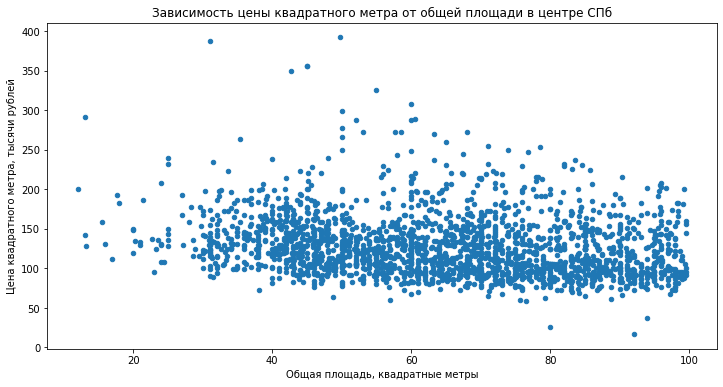

In [109]:
# 
df_centr_in.sort_values('price_meter').plot(x='total_area', y='price_meter', kind='scatter', figsize=(12,6))
plt.title('Зависимость цены квадратного метра от общей площади в центре СПб')
plt.xlabel('Общая площадь, квадратные метры')
plt.ylabel('Цена квадратного метра, тысячи рублей')
plt.show();

В целом диаграмма для центра похожа на диаграмму для всей базы объявлений, только  цены выше. 

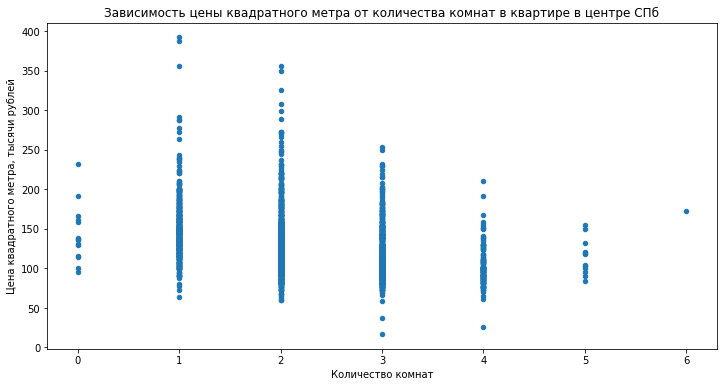

In [110]:
df_centr_in.sort_values('price_meter').plot(x='rooms', y='price_meter', kind='scatter', figsize=(12,6))
plt.title('Зависимость цены квадратного метра от количества комнат в квартире в центре СПб')
plt.xlabel('Количество комнат')
plt.ylabel('Цена квадратного метра, тысячи рублей')
plt.show();

Самый дорогой метр в центре у однокомнатных квартир, выгоднее всего можно купить 3-х и 4-х комнатные квартиры. 

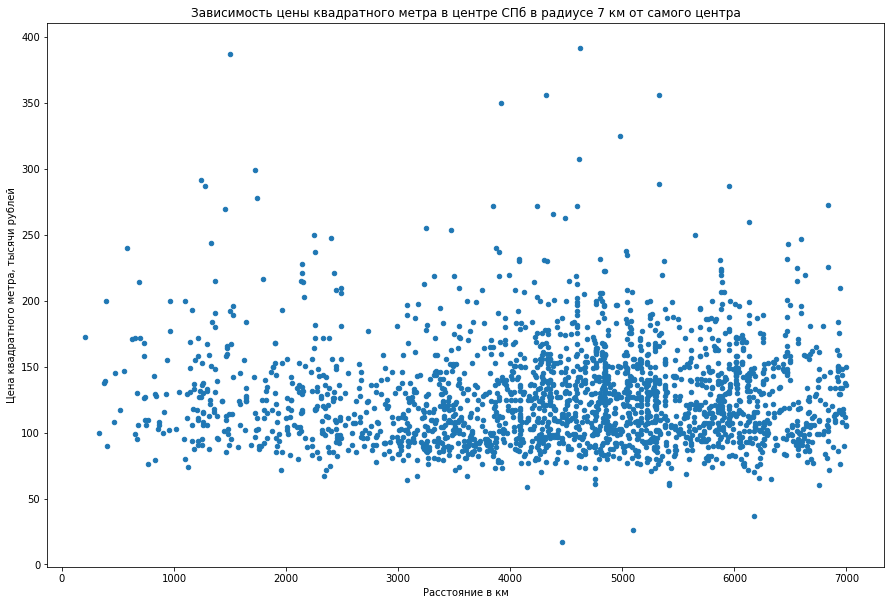

In [111]:
df_centr_in.sort_values('price_meter').plot(x='cityCenters_nearest', y='price_meter', kind='scatter', figsize=(15,10))
plt.title('Зависимость цены квадратного метра в центре СПб в радиусе 7 км от самого центра')
plt.xlabel('Расстояние в км')
plt.ylabel('Цена квадратного метра, тысячи рублей')
plt.show();

Минимальные цены с удалением от центра незначительно снижаются, максимальные растут. С удалением от центра расширяется диапазон цен и увеличивется количество предложений.

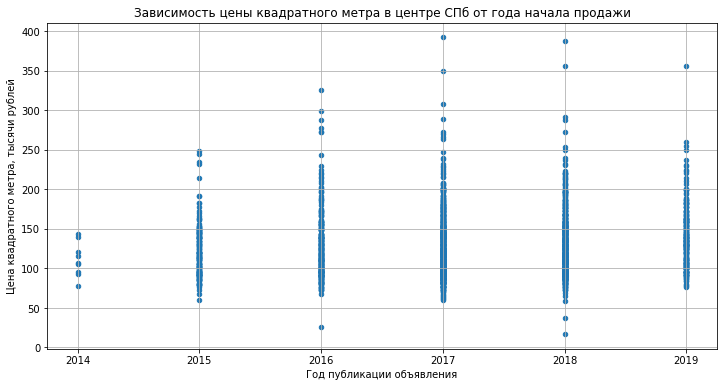

In [112]:
df_centr_in.sort_values('price_meter').plot(x='time_year', y='price_meter', kind='scatter', figsize=(12,6), grid=True)
plt.title('Зависимость цены квадратного метра в центре СПб от года начала продажи')
plt.xlabel('Год публикации объявления')
plt.ylabel('Цена квадратного метра, тысячи рублей')
plt.show();

Наблюдается вялый рынок 2014 года, максимальная цена меньше 150 тыс. за кв.метр. Пик предложения и цен пришелся на 2017 год. В 2019 году минимальные цены повысились а максимальные снизились.

Исследовали влияние на цену квадратного метра квартиры различных факторов и установили следующее:
* **площадь квартиры** в массовом сегменте до 100 метров слабо влияет на цену квадратного метра, с увеличением площади цена квадратного метра снижается;
* **количество комнат**, пик стоимости квадратного метра приходится на однокомнатные квартиры, для студий цена ниже и с ростом числа комнат цена квадратного метра снижается, исключение составляют квартиры в центре Санкт-Петербурга, там цена квадратного метра с ростом количества комнат  до 3 растет, а только с четырехкомнатных квартир снижается;
* **удаленность от центра**, чем дальше от центра, тем дешевле квадратный метр;
* **этаж** квартиры на первом этаже самые дешёвые, на поледнем - подороже, на любом другом этаже самые дорогие;
* **год подачи объявления** в нашем распоряжения данные об обявлениях с за последние 2 месяца 2014 года, 2015, 2016, 2017, 2018, 5 месяцев 2019, в течение этого времени цена квадратного метра постоянно росла по верхней границе рассеяния, при этом в низкоценовом сегменте цены практически не менялись;
* **месяц и день недели** влияния этих параметров выявить не удалось;
* **населенный пункт** в котром находится жилое помещение, цена квадратного метра жилья очень сильно зависит от его местоположения, из 10 населенных пунктов, в которых продается больше всего квартир разброс цен от 60 до 120 тысяч рублей, самые дорогие в Санкт-Петербурге, самые не дорогие в Выборге;
* **особенности квартир в центре города** выделили круг  радиусом 7 км, обозначив квартиры внутри него как квартиры в центре. Для квартир в центре характерны более высокая стоимость квадратного метра, большее количество комнат в квартирах, больее высокие потолки. В отличии от всего датафрэйма для центра наблюдается рост цены квадратного метра с увеличением числа комнат до 3, только потом идёт снижение. С удалением от центра количество сделок растет, но цены не снижаются, динамика изменения цен по годам такая же как для всех.

## Общий вывод

Проведено исследование архива объявлений о продаже квартир в Санкт-Петербурге и соседних населенных пунктах, опубликованных за период с ноября 2014 по май 2019 года.

Сведения состоят из двух частей, вписанные продавцом характеристики продаваемого объекта и полученная автоматически на основе картографических данных информация об удаленности объекта от центра, аэропорта, парков, водоемов.

В базе данных были обнаружены пропуски и недостоверные сведения, появление которых объясняется человеческим фактором в широком смысле этого стлова, от опечеток до умышленного искажения или умалчивания. Пропуски в информациина основе картографических данных появились скорее всего по техническим причинам. Пропуски в технических параметрах заполнили и объявления с недостоверными сведениями исключили руковдствуясь здравым смыслом и сопоставлением имеющихся данных. Многочисленные пропуски в картографических данных заполнять не стали, так как корректно их заполнить без сведений о местоположении объекта невозможно. В реальных агрегаторах объявлений по продаже недвижимости имеется опция "посмотреть на карте".

Разброс цен за квадратный метр жилой недвижимости огромный, но это не помешало выявить некоторые закономерности ценообразования за определенный период.

Самые многочисленные сделки проводятся со стандартными 1, 2, 3 квартирами. Только начинает появляться такой класс жилья, как апартаменты. Очень скромно представлены объявления о продаже квартир-студий и квартир со свободной планировкой. Встречаются единичные объявления о продаже очень больших квартир по очень высоким ценам, их можно выделить в отдельную категорию "элитное жильё.

В целом с 2014 по 2019 годы цена метра росла, при этом в нижнем ценовом сегменте скорее нет. Сильно влияет на цену размер населенного пуекта и его удаленность от мегаполиса. В деревнях цена квадратного метра начинается с 8 - 10 тысяч рублей, в Выборге медианное значение цены квадрата 60 тысяч рублей, в Санкт-Петербурге 115 тысяч рублей. При прочих равных условиях привлекательность жилья, а значит его стоимость увеличивается для квартир с высоким потолком, этаж не первый и не последний, это всем известно без анализа, но приятно получить научное подтверждение.

Цена квадратного метра уменьшается с ростом числа комнат и площади квартиры, только стоимость всей квартиры увеличивается, поэтому бедные, как всегда платят больше. Самый дорогой квадратный метр в однокомнатных квартирах.

Большой разброс цен в каждом из проведенных соспоставлений обусловлен тем, что техническое сотояние квартиры, качество ремонта, близость метро, вид из окон, возможность парковки и множество других характеристик, которые очень сильно влияют на стоимость